# 건강검진 데이터로 가설 검증하기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [4]:
from IPython.display import set_matplotlib_formats

In [5]:
set_matplotlib_formats('retina')

In [6]:
df = pd.read_csv("data/NHIS_OPEN_GJ_2017.csv", encoding='cp949')

In [7]:
df.shape

(1000000, 34)

In [8]:
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   
1  2017        2     1            7    11        180         80  89.0    0.9   
2  2017        3     1            9    41        165         75  91.0    1.2   
3  2017        4     1           11    48        175         80  91.0    1.5   
4  2017        5     1           11    30        165         60  80.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0   1.0         1      NaN    NaN      NaN   
1    1.2  ...   27.0   3.0   0.0         1      NaN    NaN      NaN   
2    1.5  ...   68.0   1.0   0.0         0      NaN    NaN      NaN   
3    1.2  ...   18.0   1.0   0.0         1      NaN    NaN      NaN   
4    1.2  ...   25.0   1.0   0.0         1      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  2.0  20181126  
2           NaN  NaN  20181126  
3           NaN  0.0  20181126  
4           NaN  0.0  20181126  

[5 rows x 34 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [10]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

In [12]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [16]:
df.columns.nunique()

34

## 데이터 정제

### 결측치 정제

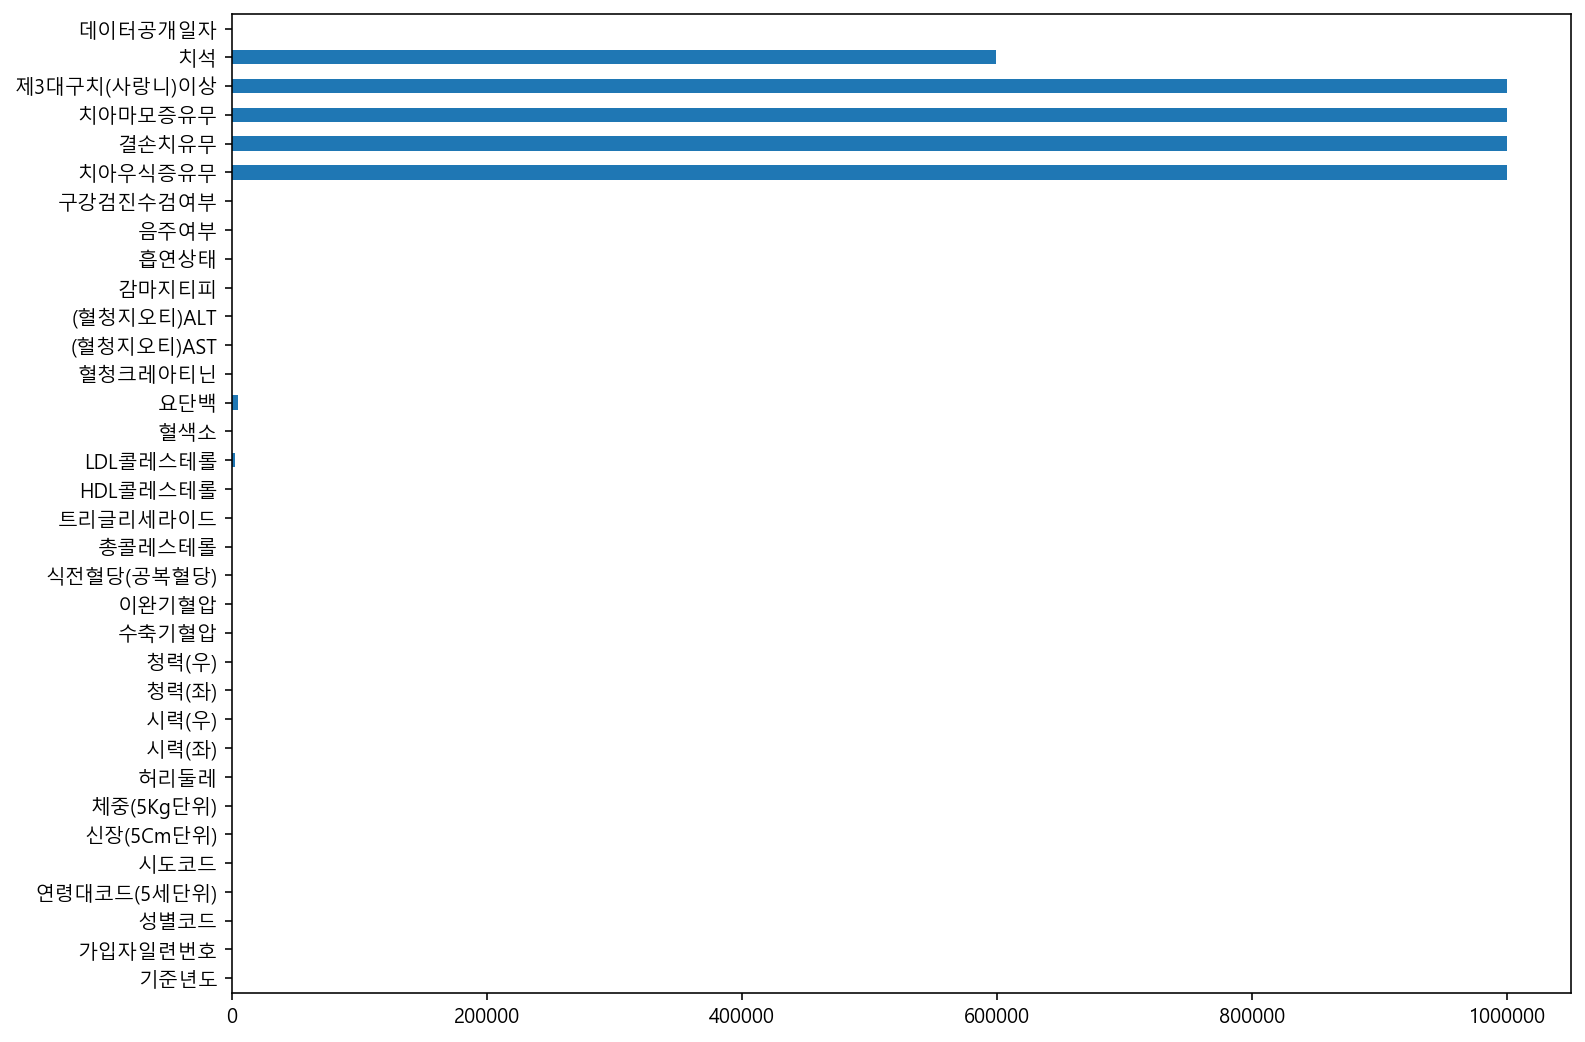

In [15]:
df.isnull().sum().plot.barh(figsize=(12,9))

### 일부 데이터 요약하기

In [19]:
# "(혈청지오티)ALT", "(혈청지오티)AST"
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

(혈청지오티)ALT  (혈청지오티)AST
0        35.0        21.0
1        36.0        20.0
2        32.0        47.0
3        34.0        29.0
4        12.0        19.0

In [20]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999958 non-null  float64
 1   (혈청지오티)AST  999959 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [21]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()
# max값이 매우 큰 것을 알 수 있음. 이상치일 가능성이 높음

(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

### value_counts로 데이터 집계하기

In [22]:
df['성별코드'].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [23]:
df['흡연상태'].value_counts()
# 1.비흡연 3.흡연 2.흡연했다가 비흡연

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

### groupby, pivot_table을 통한 데이터 그룹화하기

In [26]:
df.groupby(['성별코드']).mean()

기준년도        가입자일련번호  연령대코드(5세단위)       시도코드   신장(5Cm단위)  체중(5Kg단위)  \
성별코드                                                                         
1     2017.0  499656.610053    10.308458  34.098773  168.537858  70.120963   
2     2017.0  500388.929624    10.773935  33.238046  155.101397  55.528972   

           허리둘레     시력(좌)     시력(우)     청력(좌)  ...      감마지티피      흡연상태  \
성별코드                                           ...                        
1     85.079026  1.036886  1.035752  1.032173  ...  49.445130  2.062924   
2     76.883707  0.916758  0.912829  1.031174  ...  23.335241  1.093455   

          음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  제3대구치(사랑니)이상        치석  \
성별코드                                                                        
1     0.672553  0.435324      NaN    NaN      NaN           NaN  0.639805   
2     0.303534  0.361215      NaN    NaN      NaN           NaN  0.550845   

         데이터공개일자  
성별코드              
1     20181126.0  
2     20181126.0  

[2 rows x 33 columns]

In [28]:
df.groupby(['성별코드', '흡연상태'])['가입자일련번호'].count()

성별코드  흡연상태
1     1.0     165904
      2.0     165186
      3.0     199277
2     1.0     442038
      2.0      11026
      3.0      16425
Name: 가입자일련번호, dtype: int64

In [29]:
df.groupby(['성별코드', '음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [31]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     0.0     34.739868
      1.0     56.610981
2     0.0     22.612408
      1.0     25.001018
Name: 감마지티피, dtype: float64

In [32]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [34]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(['count', 'mean', 'median'])

count       mean  median
성별코드 음주여부                           
1    0.0   173604  34.739868    25.0
     1.0   356576  56.610981    37.0
2    0.0   326813  22.612408    17.0
     1.0   142429  25.001018    17.0

In [ ]:
# pivot은 연산을 하지 않고 데이터 형태를 보고 싶을 때 사용
# pivot_table은 연산을 하고 싶을 때 사용
# groupby는 series 형태로 데이터 출력(사용자 지정에 따라 dataframe형태로도 출력) / pivot_tab;e은 dataframe형태로 데이터 출력

In [ ]:
# groupby는 좀 더 빠르게 데이터 출력이 가능함 / pivot_table은 느린 대신 직관적으로 코드 작성이 가능

In [37]:
df.pivot_table(index='음주여부', values='가입자일련번호', aggfunc='count')

가입자일련번호
음주여부         
0.0    500439
1.0    499025

In [40]:
# df.pivot_table(index='음주여부', values='감마지티피', aggfunc='mean')
pd.pivot_table(data=df, index='음주여부', values='감마지티피', aggfunc='mean')
# 둘 다 같은 것임. 

감마지티피
음주여부           
0.0   26.819650
1.0   47.588675

In [41]:
pd.pivot_table(data=df, index='음주여부', values='감마지티피', aggfunc=['mean', 'median'])

mean median
          감마지티피  감마지티피
음주여부                  
0.0   26.819650   19.0
1.0   47.588675   30.0

In [43]:
pd.pivot_table(data=df, index=['성별코드', '음주여부'], values='감마지티피', aggfunc='describe')

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     1.0   24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    0.0   13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     1.0   13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

In [45]:
pd.pivot_table(data=df, index=['성별코드', '흡연상태'], values='감마지티피', aggfunc='describe')
# 담배나 술 모두 하는 사람들이 감마지티피의 수치가 높은 것을 알 수 있다.

25%   50%   75%     count    max       mean  min        std
성별코드 흡연상태                                                              
1    1.0   19.0  27.0  43.0  165895.0  999.0  39.799837  1.0  47.624341
     2.0   22.0  32.0  53.0  165182.0  999.0  48.481996  1.0  57.684006
     3.0   24.0  37.0  65.0  199271.0  999.0  58.270747  1.0  72.078993
2    1.0   13.0  17.0  24.0  442015.0  999.0  22.787530  1.0  26.781816
     2.0   13.0  18.0  27.0   11026.0  999.0  26.833484  3.0  39.612747
     3.0   15.0  21.0  34.0   16425.0  999.0  35.720244  3.0  62.011489

### 전체 데이터 시각화 하기

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C08D26F08>,
      dtype=object)

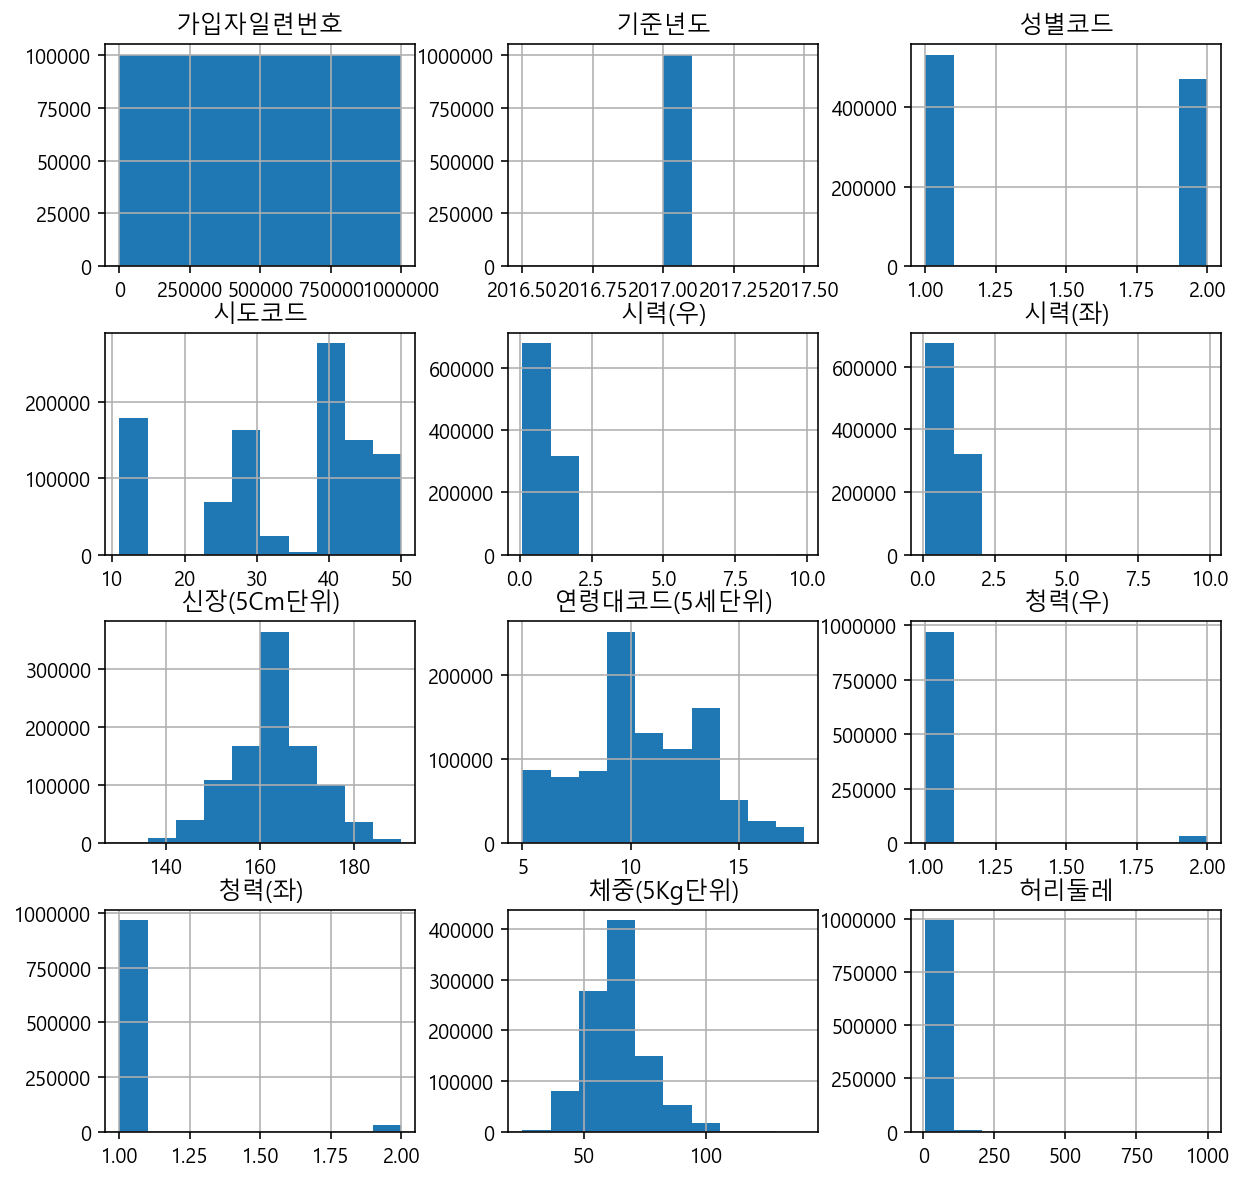

In [49]:
df.iloc[:,:12].hist(figsize=(10,10))

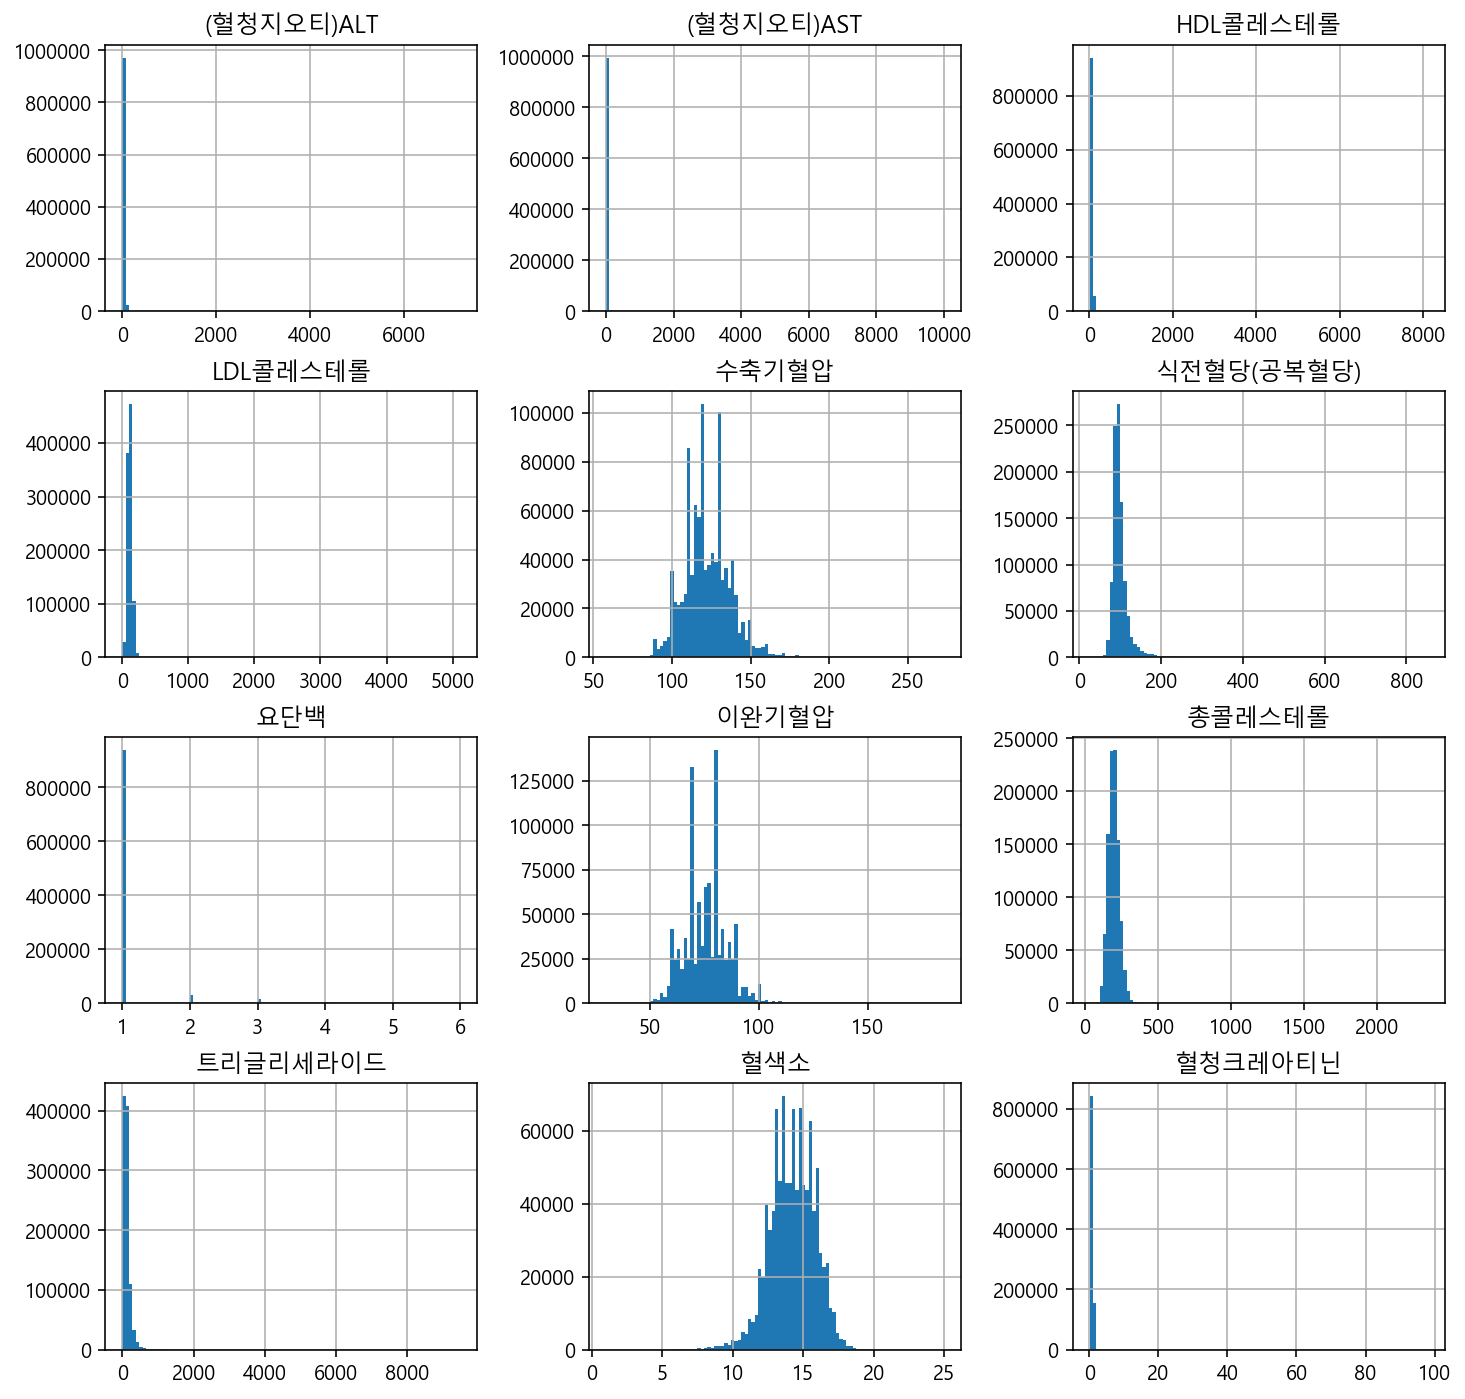

In [53]:
h = df.iloc[:,12:24].hist(figsize=(12,12), bins=100)

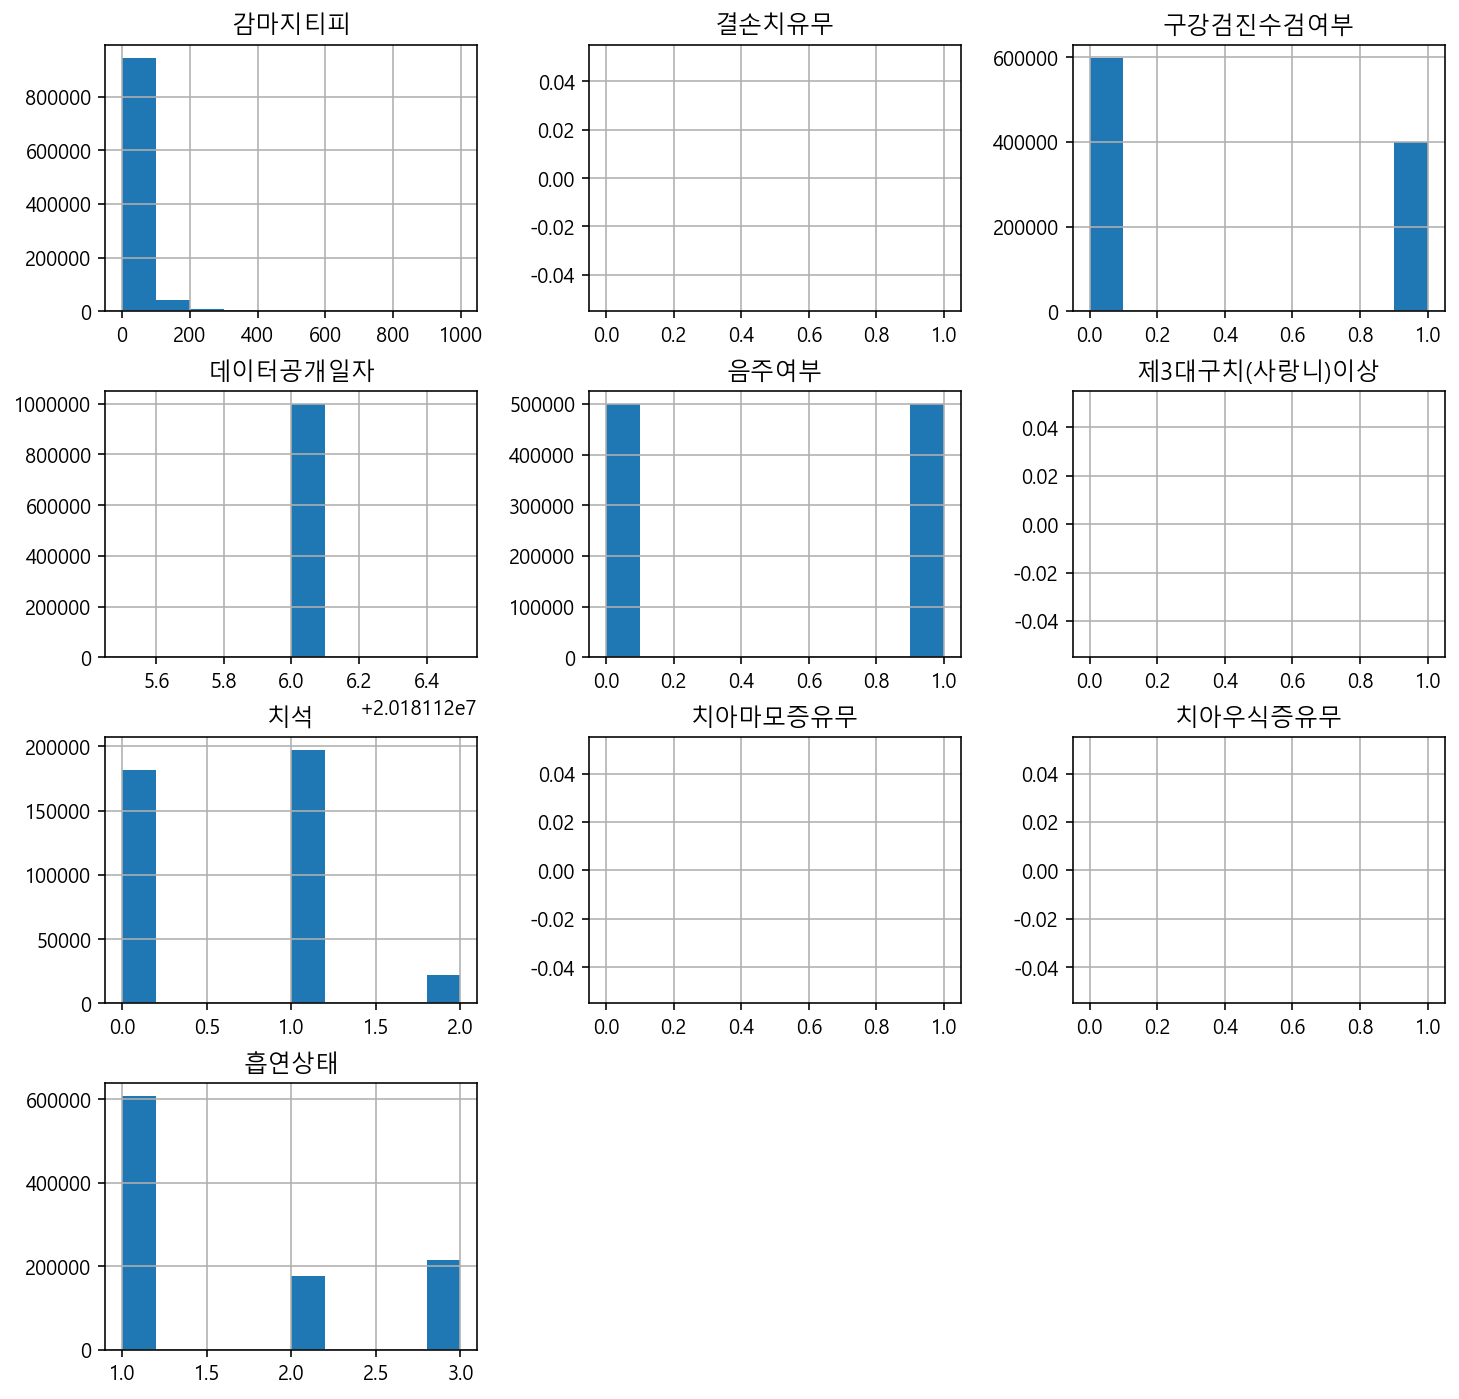

In [55]:
h = df.iloc[:,24:].hist(figsize=(12,12), bins=10)

In [57]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

### 시각화 도구 Seaborn 사용

#### 범주형 데이터 그리기(countplot)

In [60]:
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

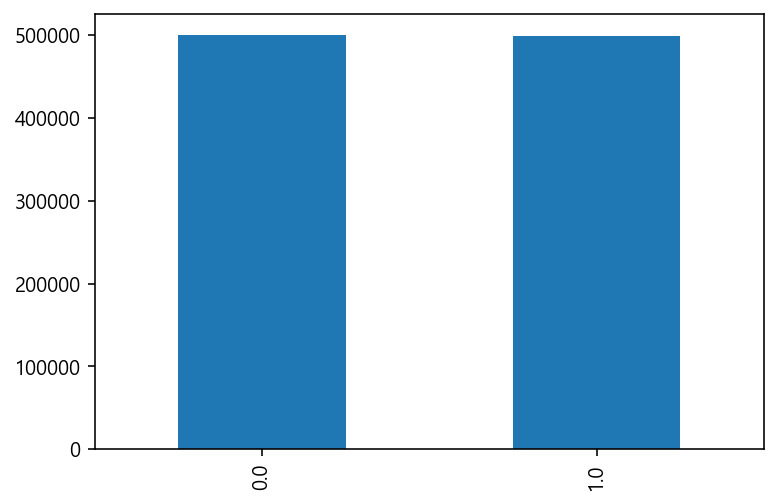

In [62]:
df['음주여부'].value_counts().plot.bar()

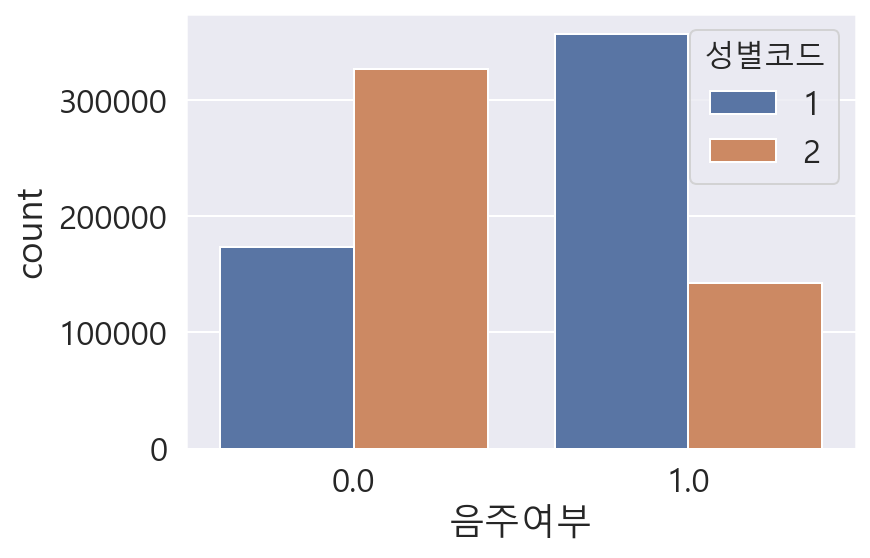

In [65]:
sns.set(font_scale=1.5 , font='Malgun Gothic')
sns.countplot(data=df, x='음주여부', hue='성별코드')

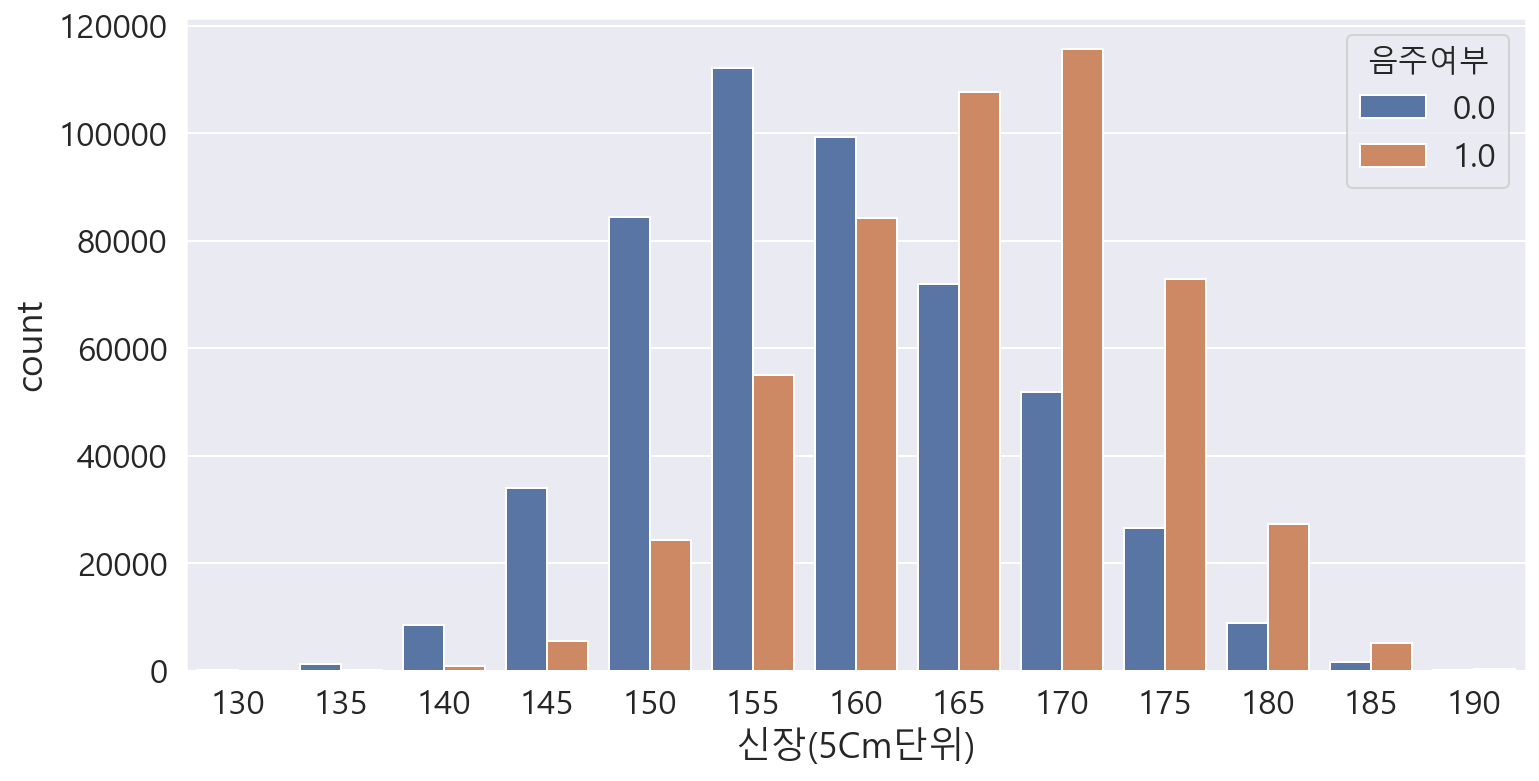

In [69]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='신장(5Cm단위)', hue='음주여부')

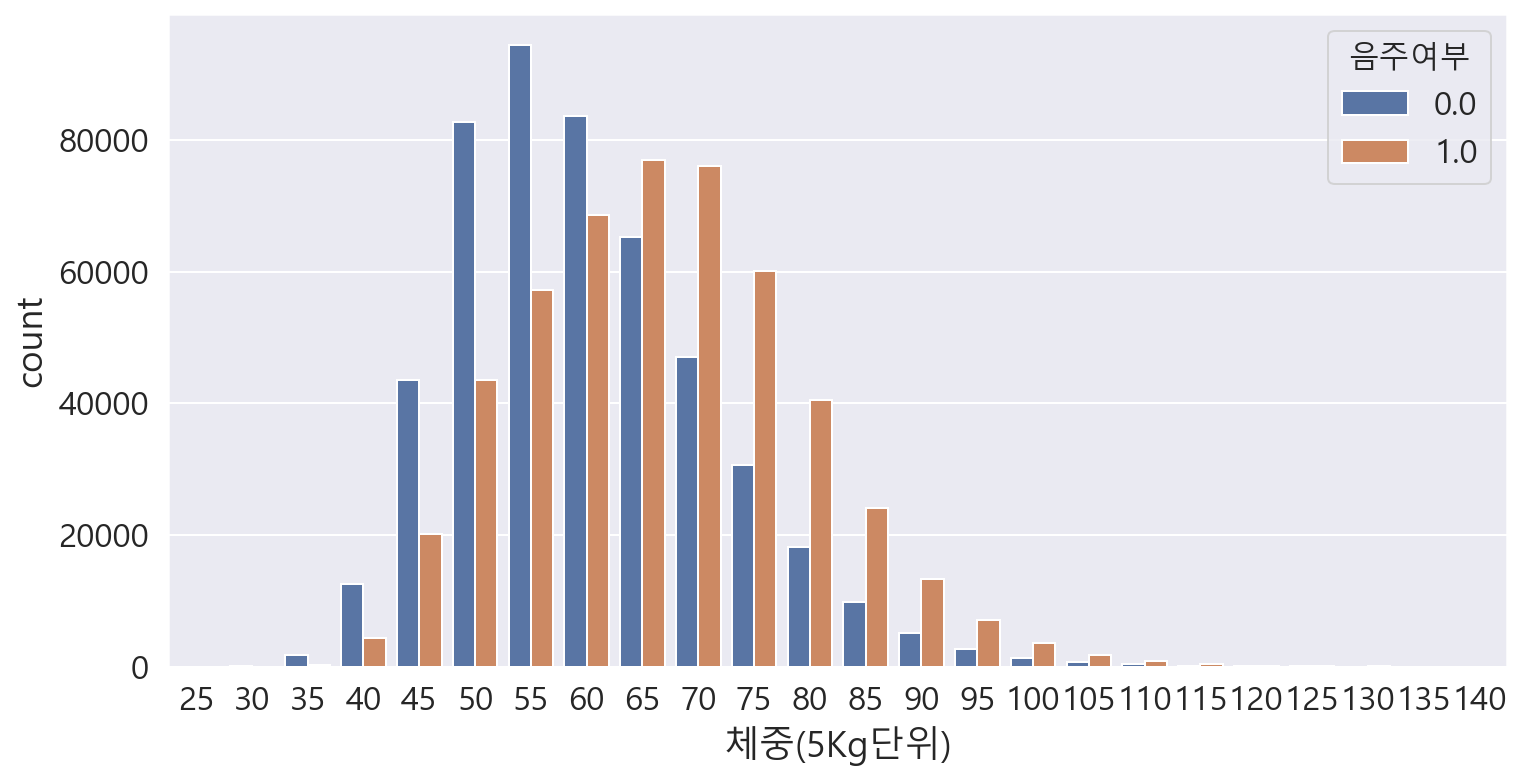

In [70]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='체중(5Kg단위)', hue='음주여부')

#### barplot: 수치형 데이터 vs 범주형 데이터

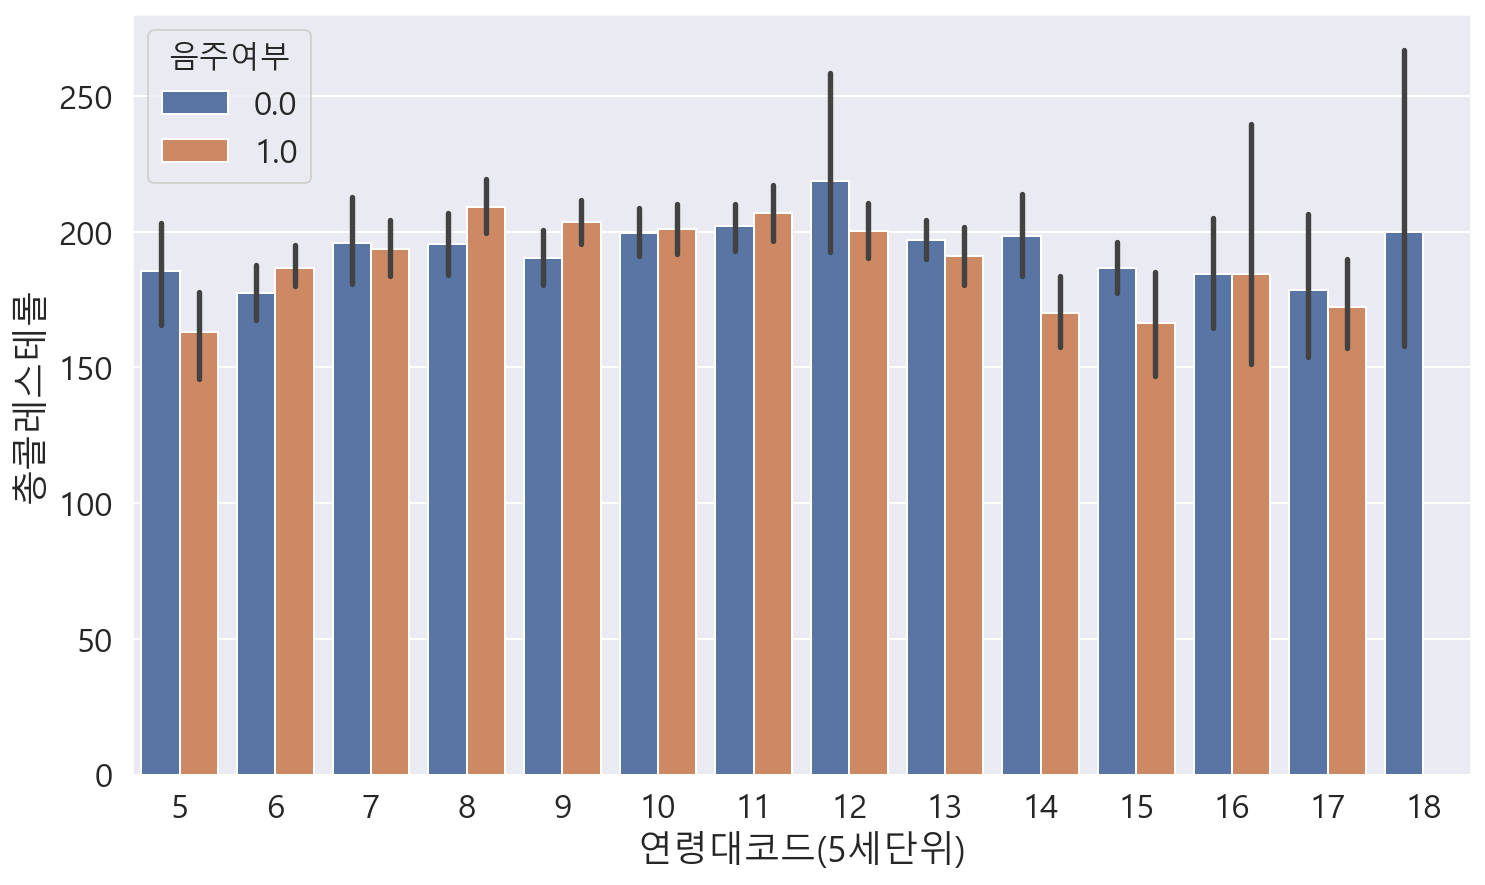

In [75]:
plt.figure(figsize=(12,7))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='총콜레스테롤', hue='음주여부')
# 각 x축 마다의 평균 값을 y축에 그린다
# x축의 데이터에는 수치형 데이터를 그리면 범주가 너무 많아지므로 범주형 데이터를 변수로 하는 것이 좋다.

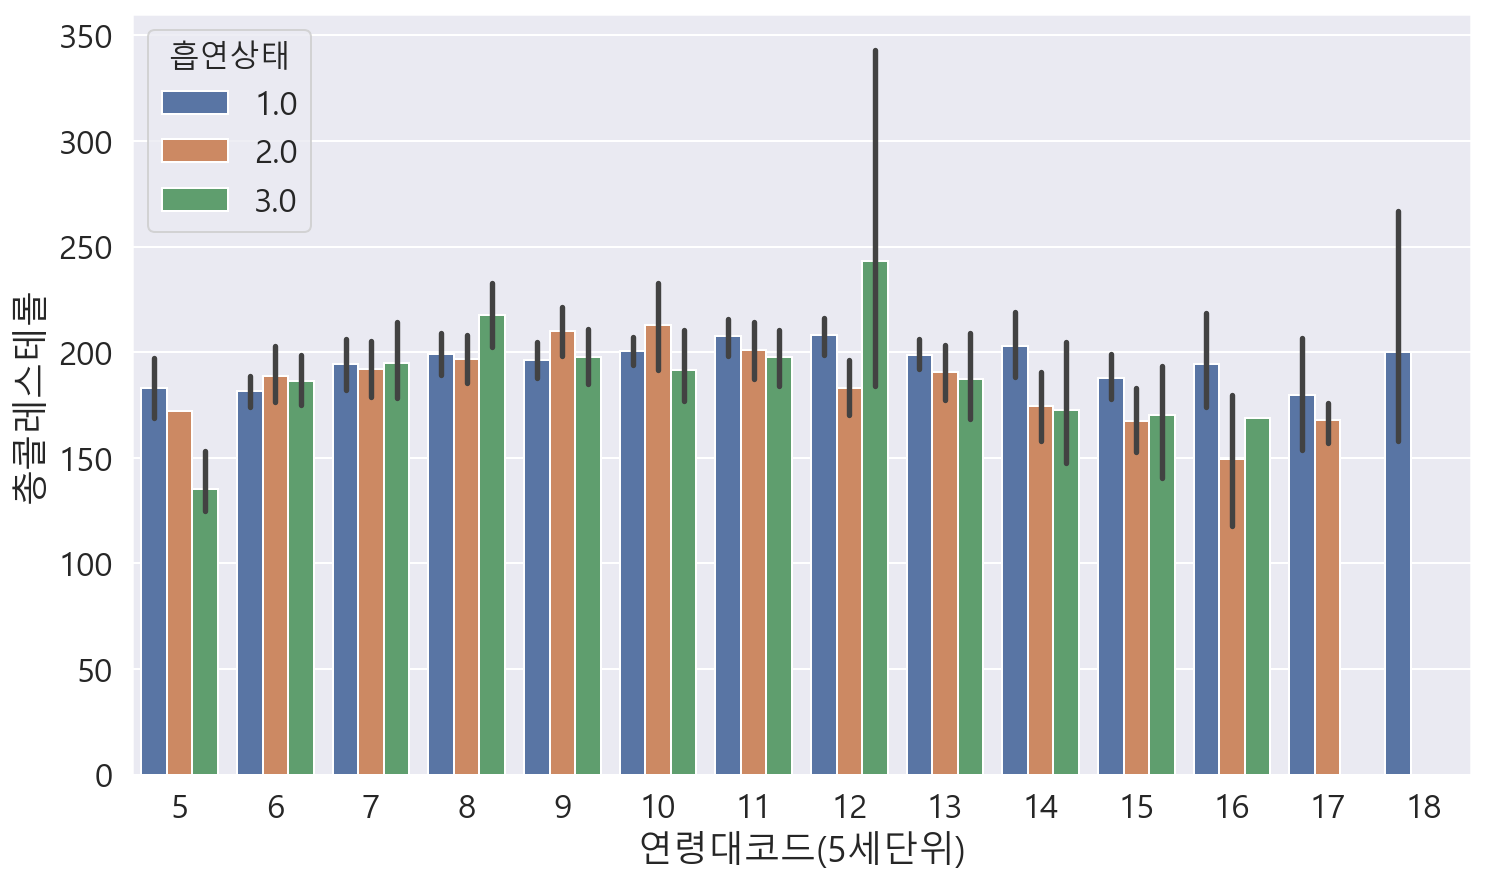

In [76]:
plt.figure(figsize=(12,7))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='총콜레스테롤', hue='흡연상태')

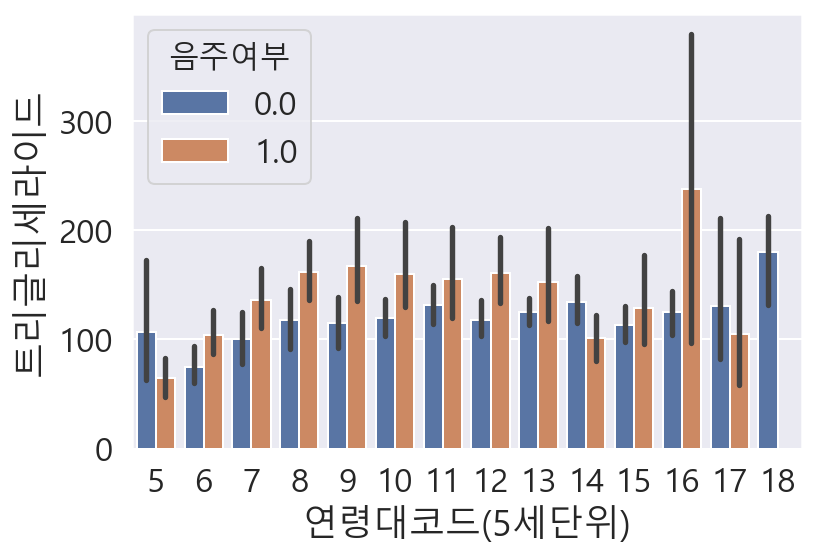

In [79]:
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='트리글리세라이드', hue='음주여부', ci=95)

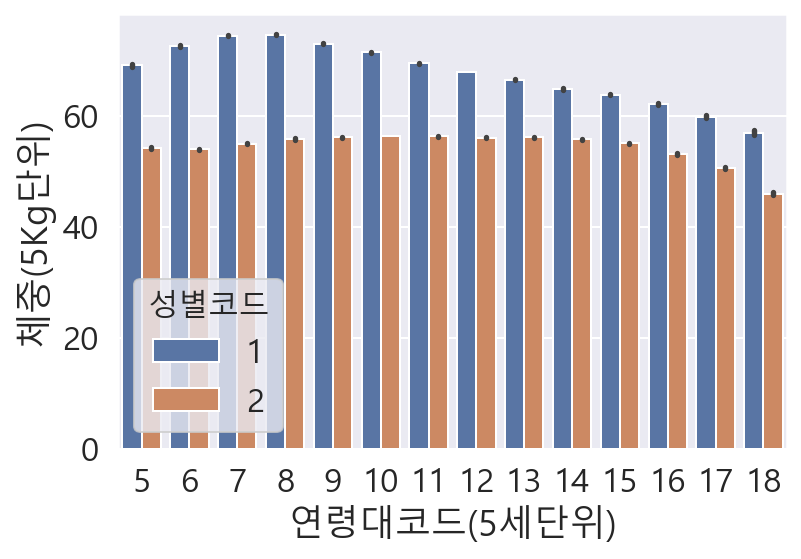

In [80]:
sns.barplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드', ci=95)

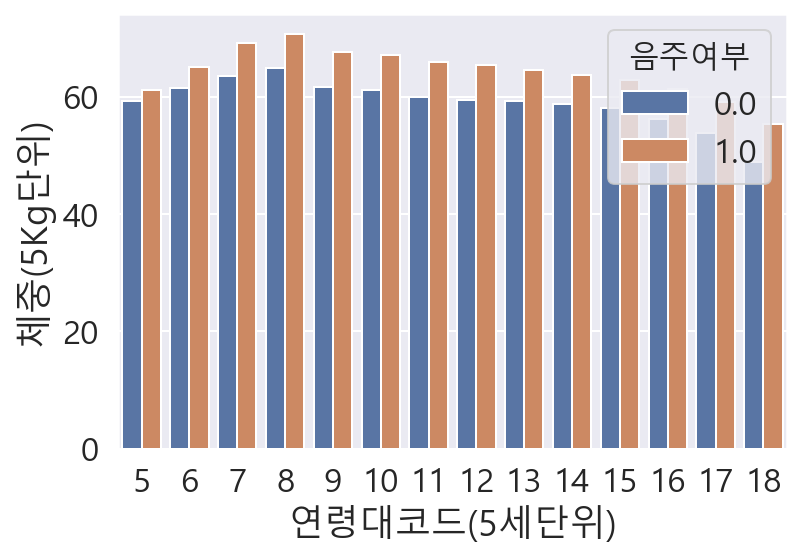

In [81]:
sns.barplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='음주여부', ci=None)
# 음주를 하면 트리글리세라이드 수치가 높고 체중도 더 많이 나감을 알 수 있다.

#### lineplot, pointplot: 수치형 데이터 vs 범주형 데이터 선 그래프로 그리기

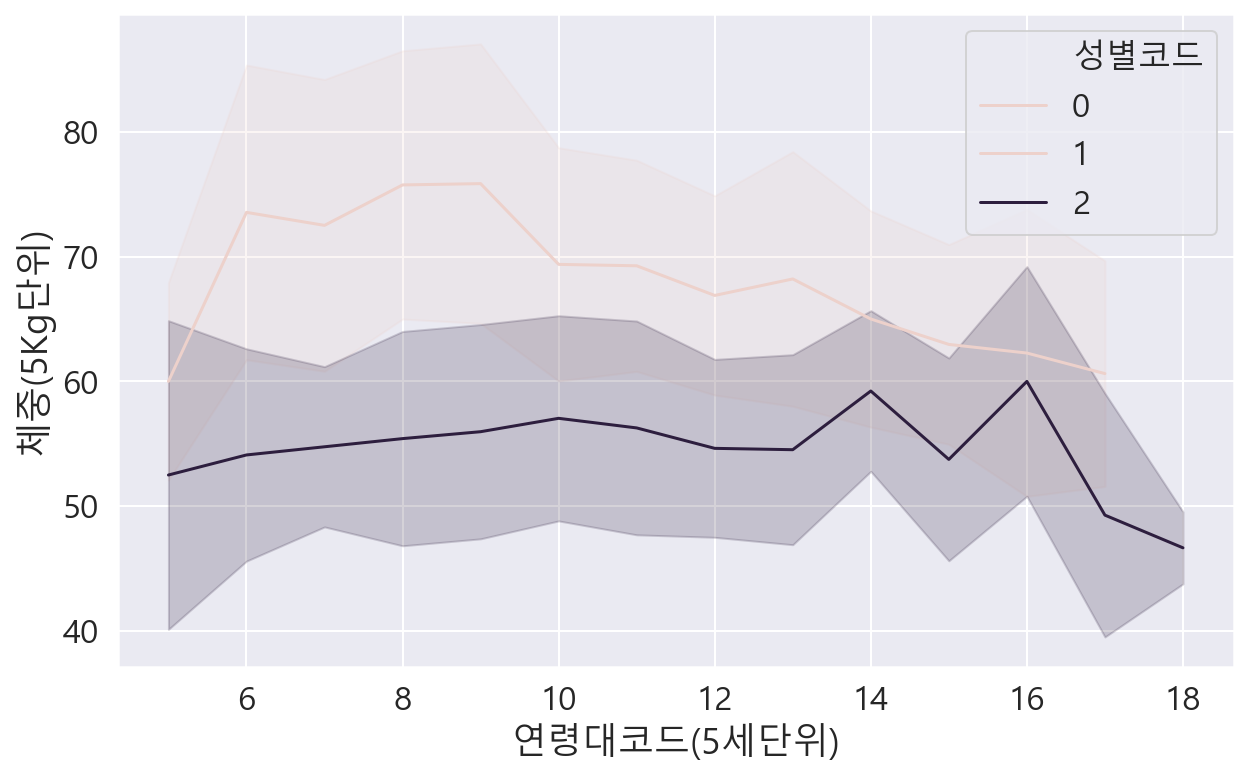

In [87]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드', ci='sd')
# 짙은 음염으로 칠해진 부분이 신뢰구간이다.

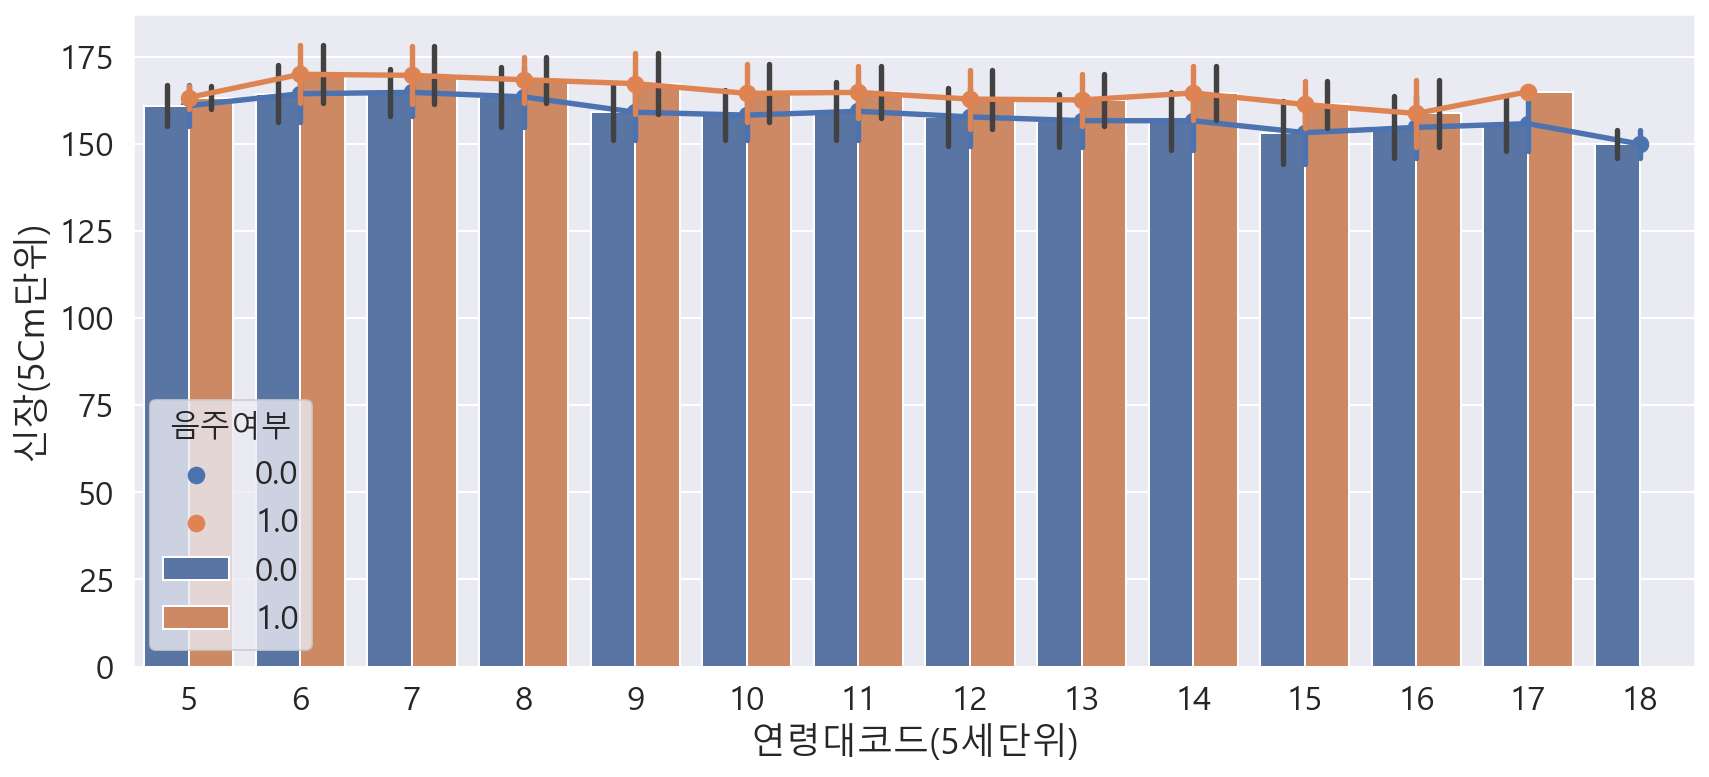

In [93]:
plt.figure(figsize=(14,6))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', ci='sd')
sns.pointplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', ci='sd')

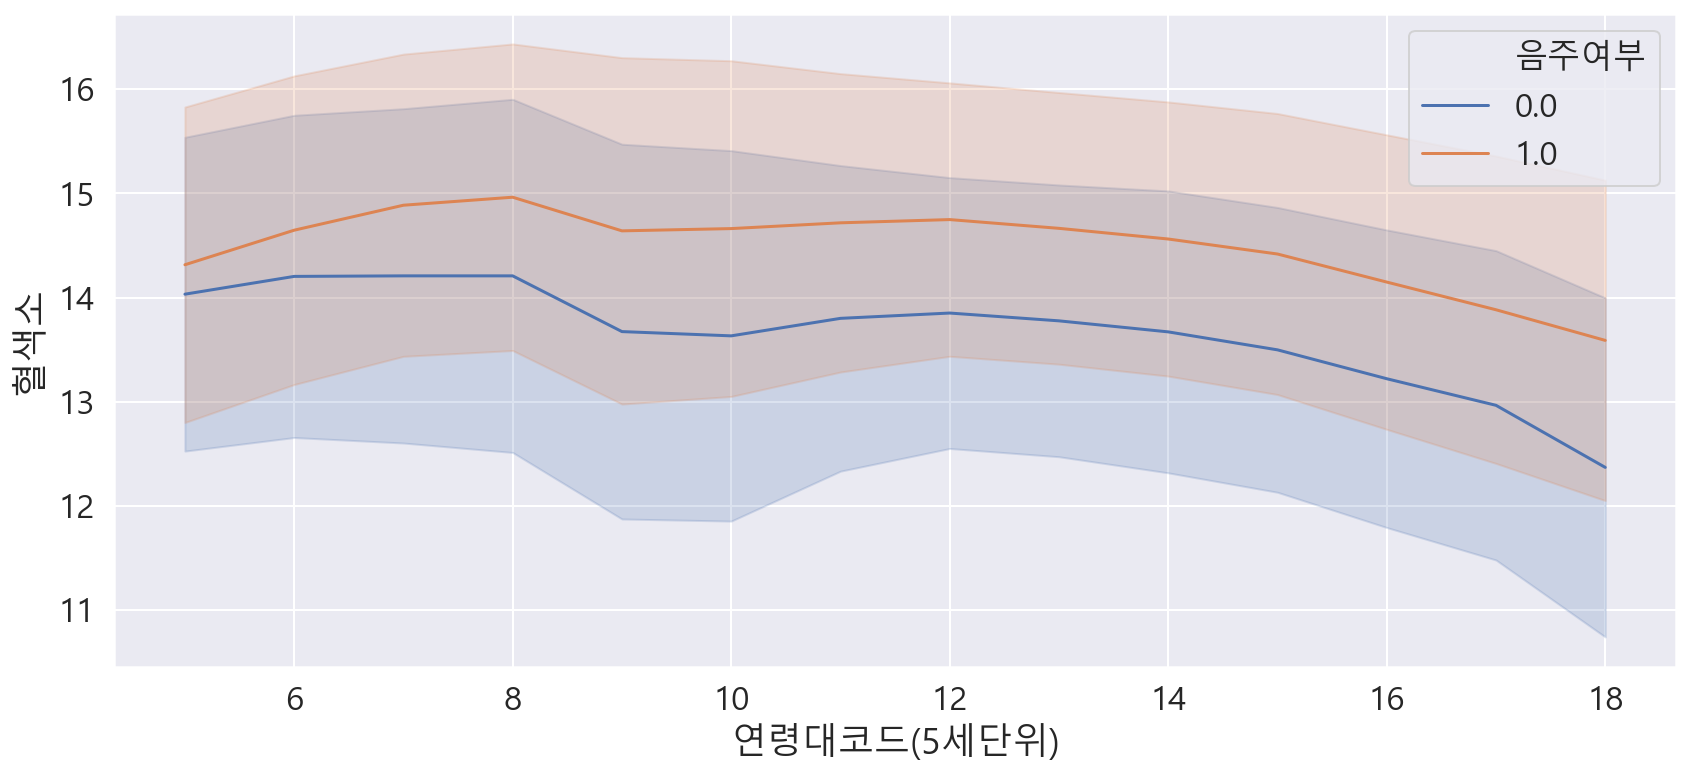

In [97]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='혈색소', hue='음주여부', ci='sd')

#### boxplot, violinplot: 데이터를 좀 더 자세하게 표현하기

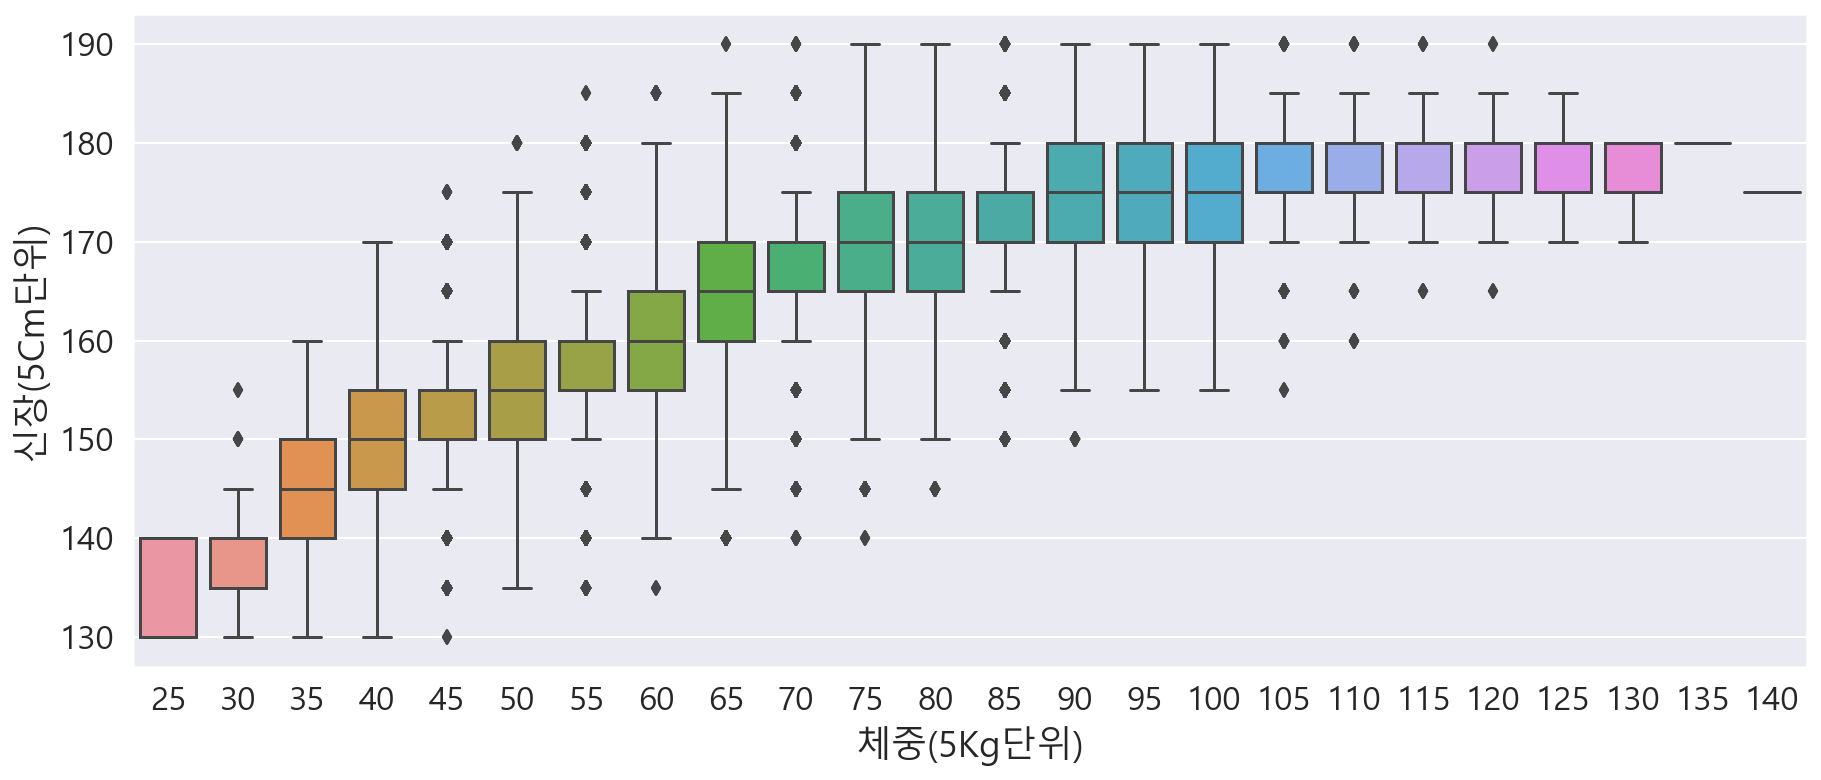

In [100]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='체중(5Kg단위)', y='신장(5Cm단위)')

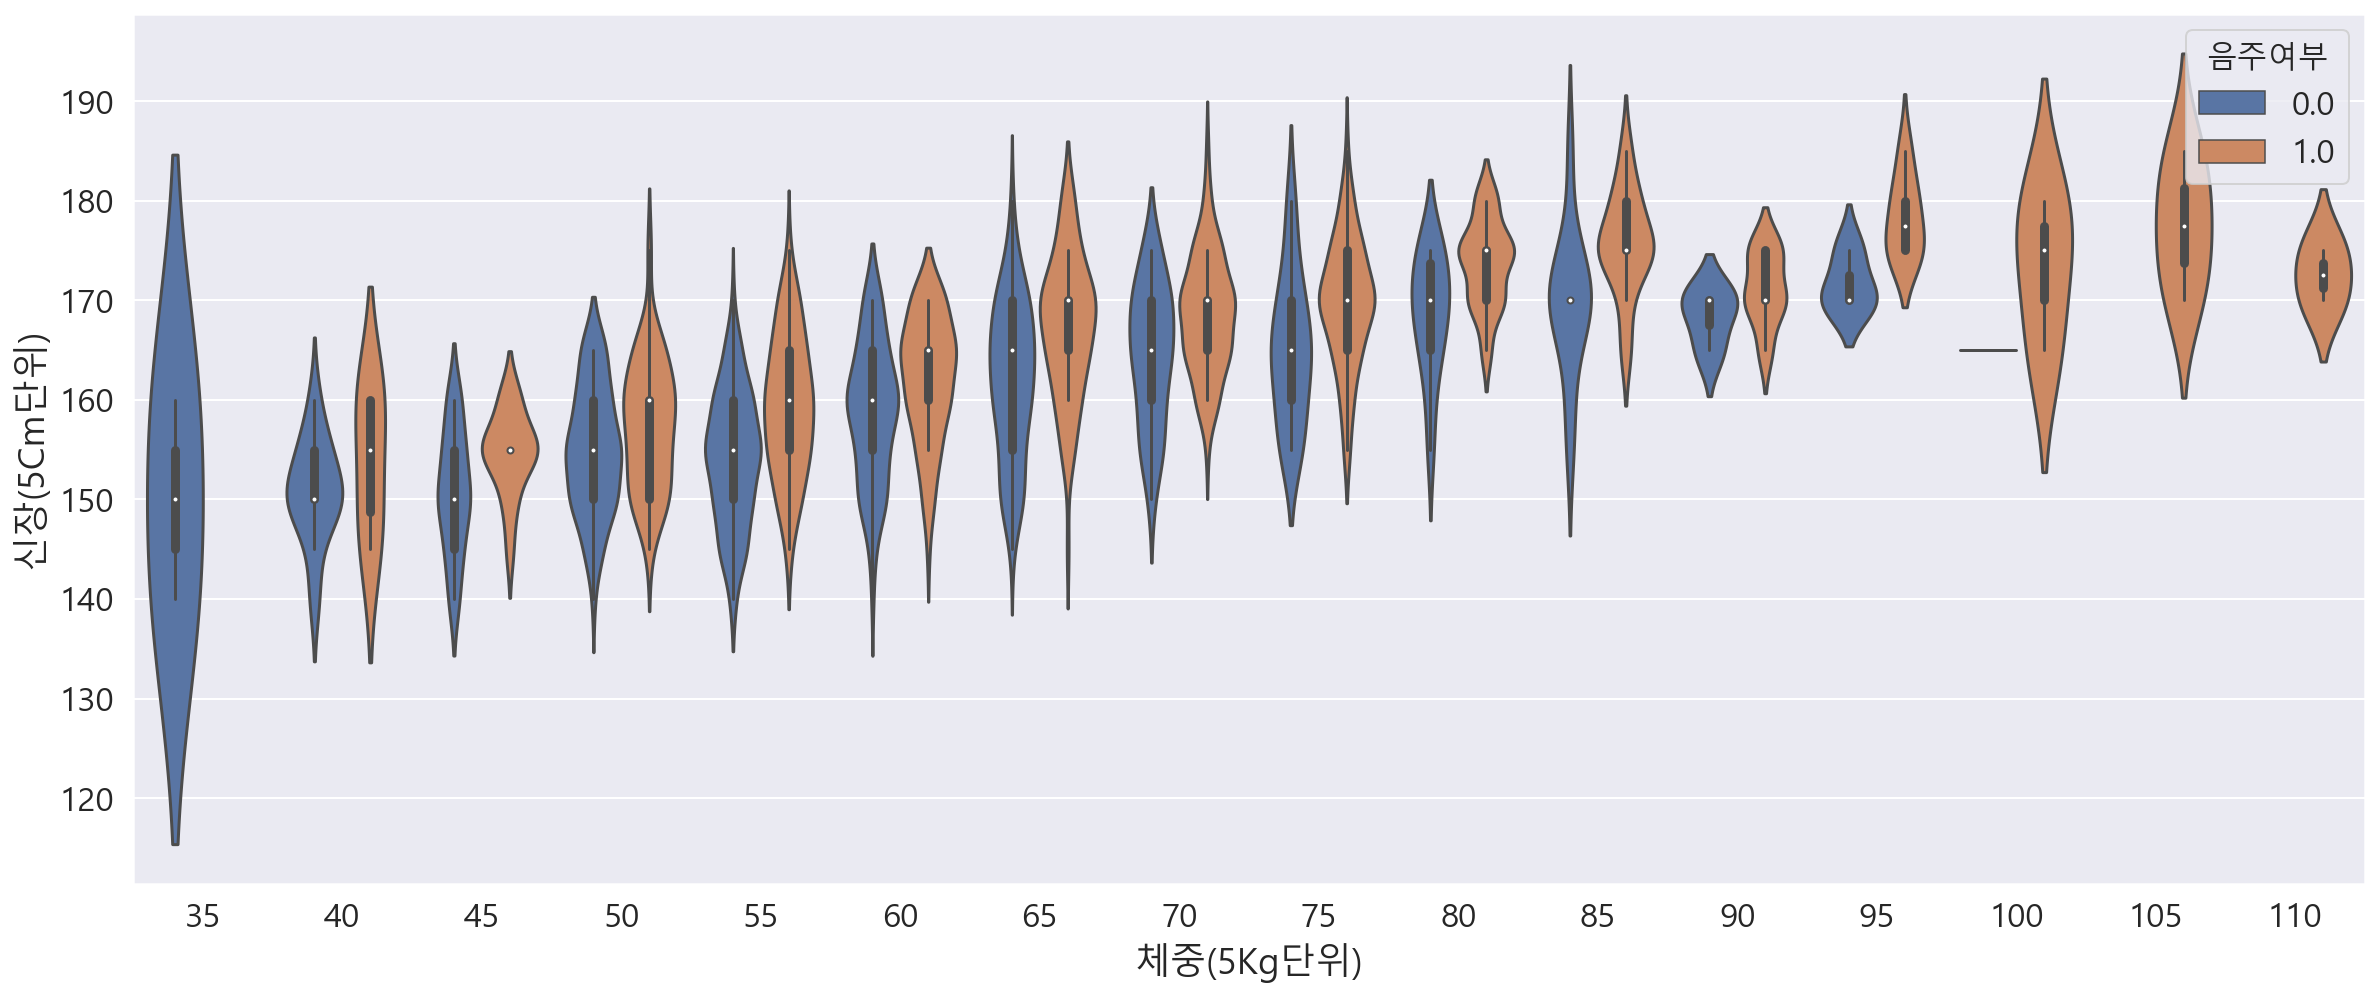

In [105]:
plt.figure(figsize=(20,8))
sns.violinplot(data=df_sample, x='체중(5Kg단위)', y='신장(5Cm단위)', hue='음주여부')

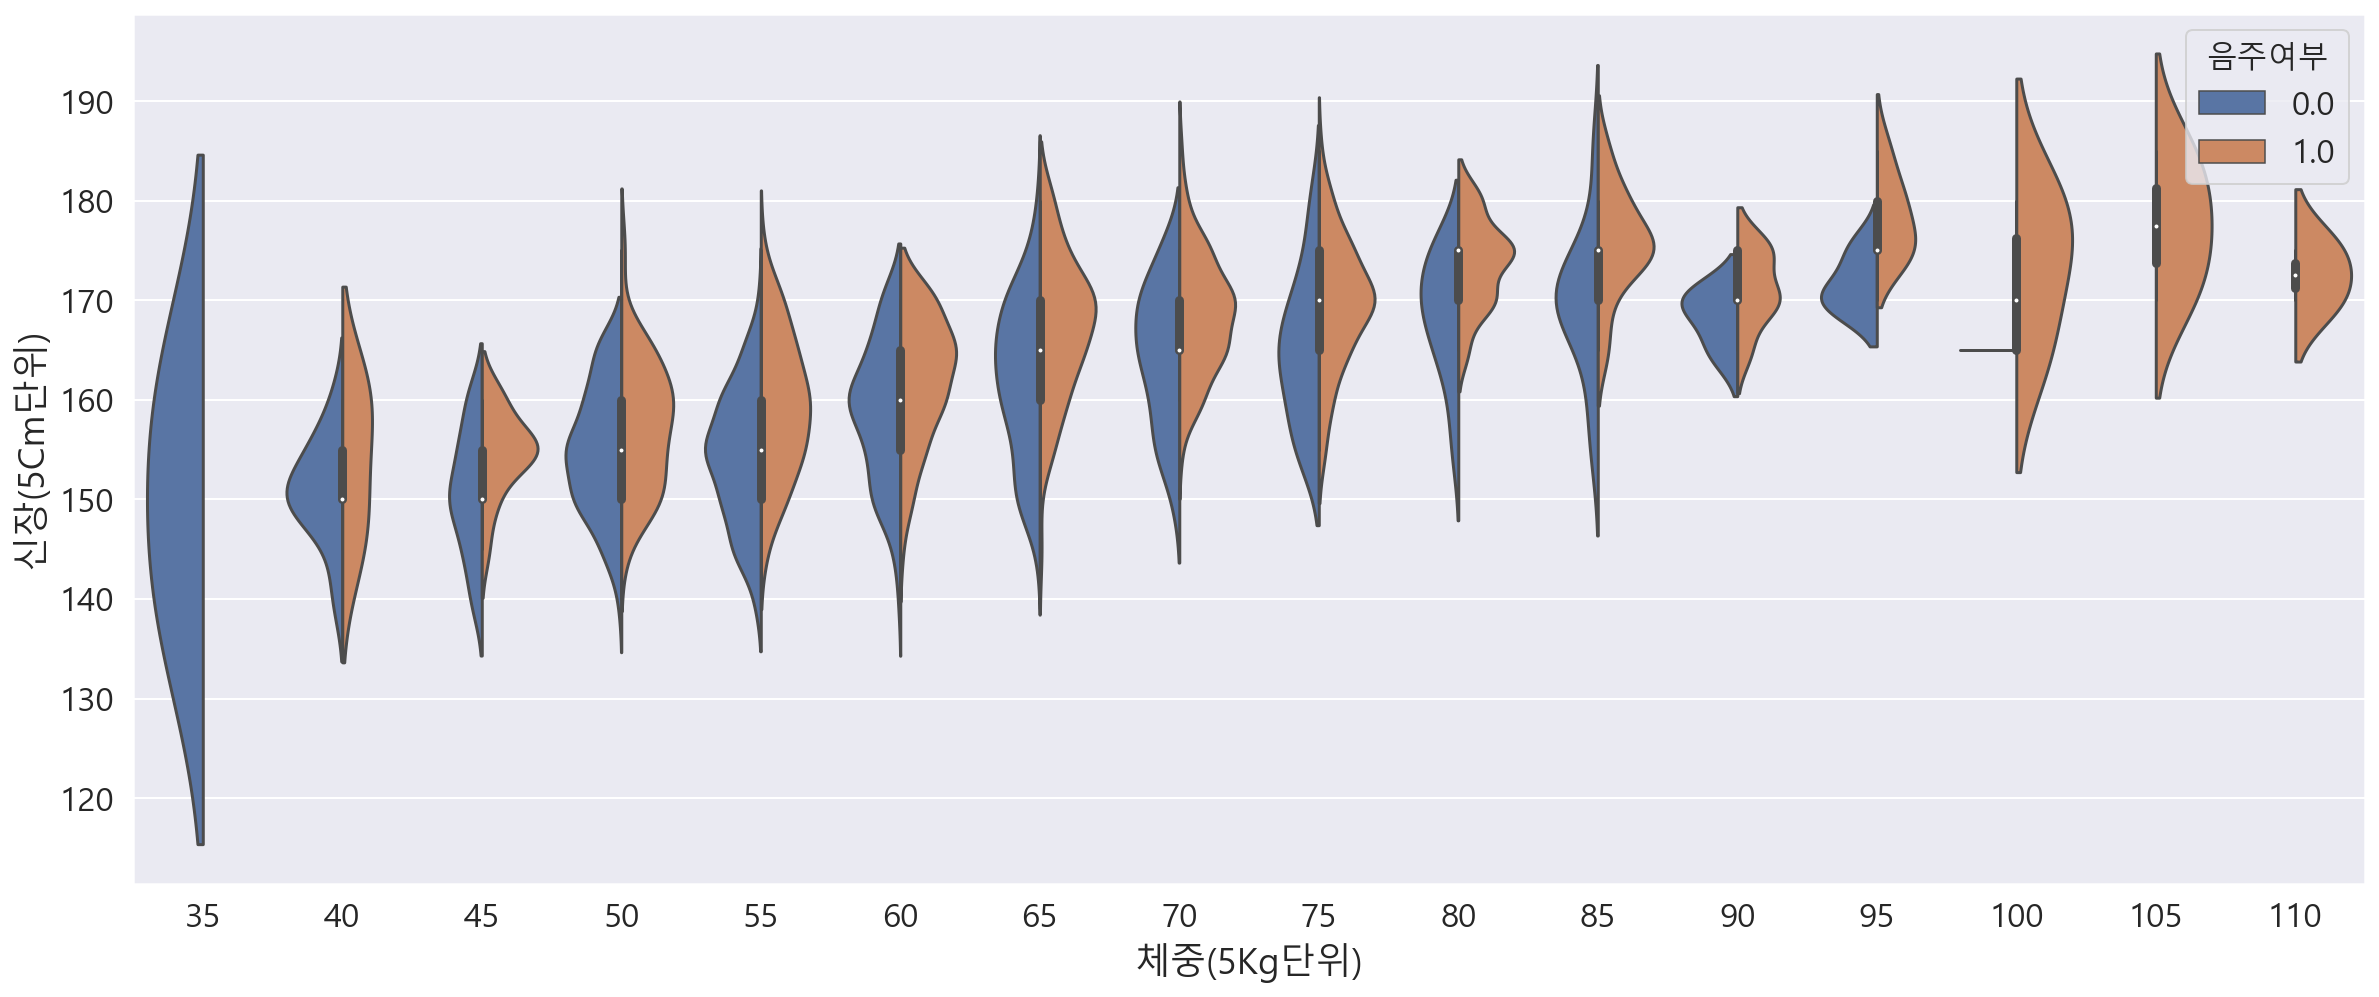

In [106]:
plt.figure(figsize=(20,8))
sns.violinplot(data=df_sample, x='체중(5Kg단위)', y='신장(5Cm단위)', hue='음주여부', split=True)

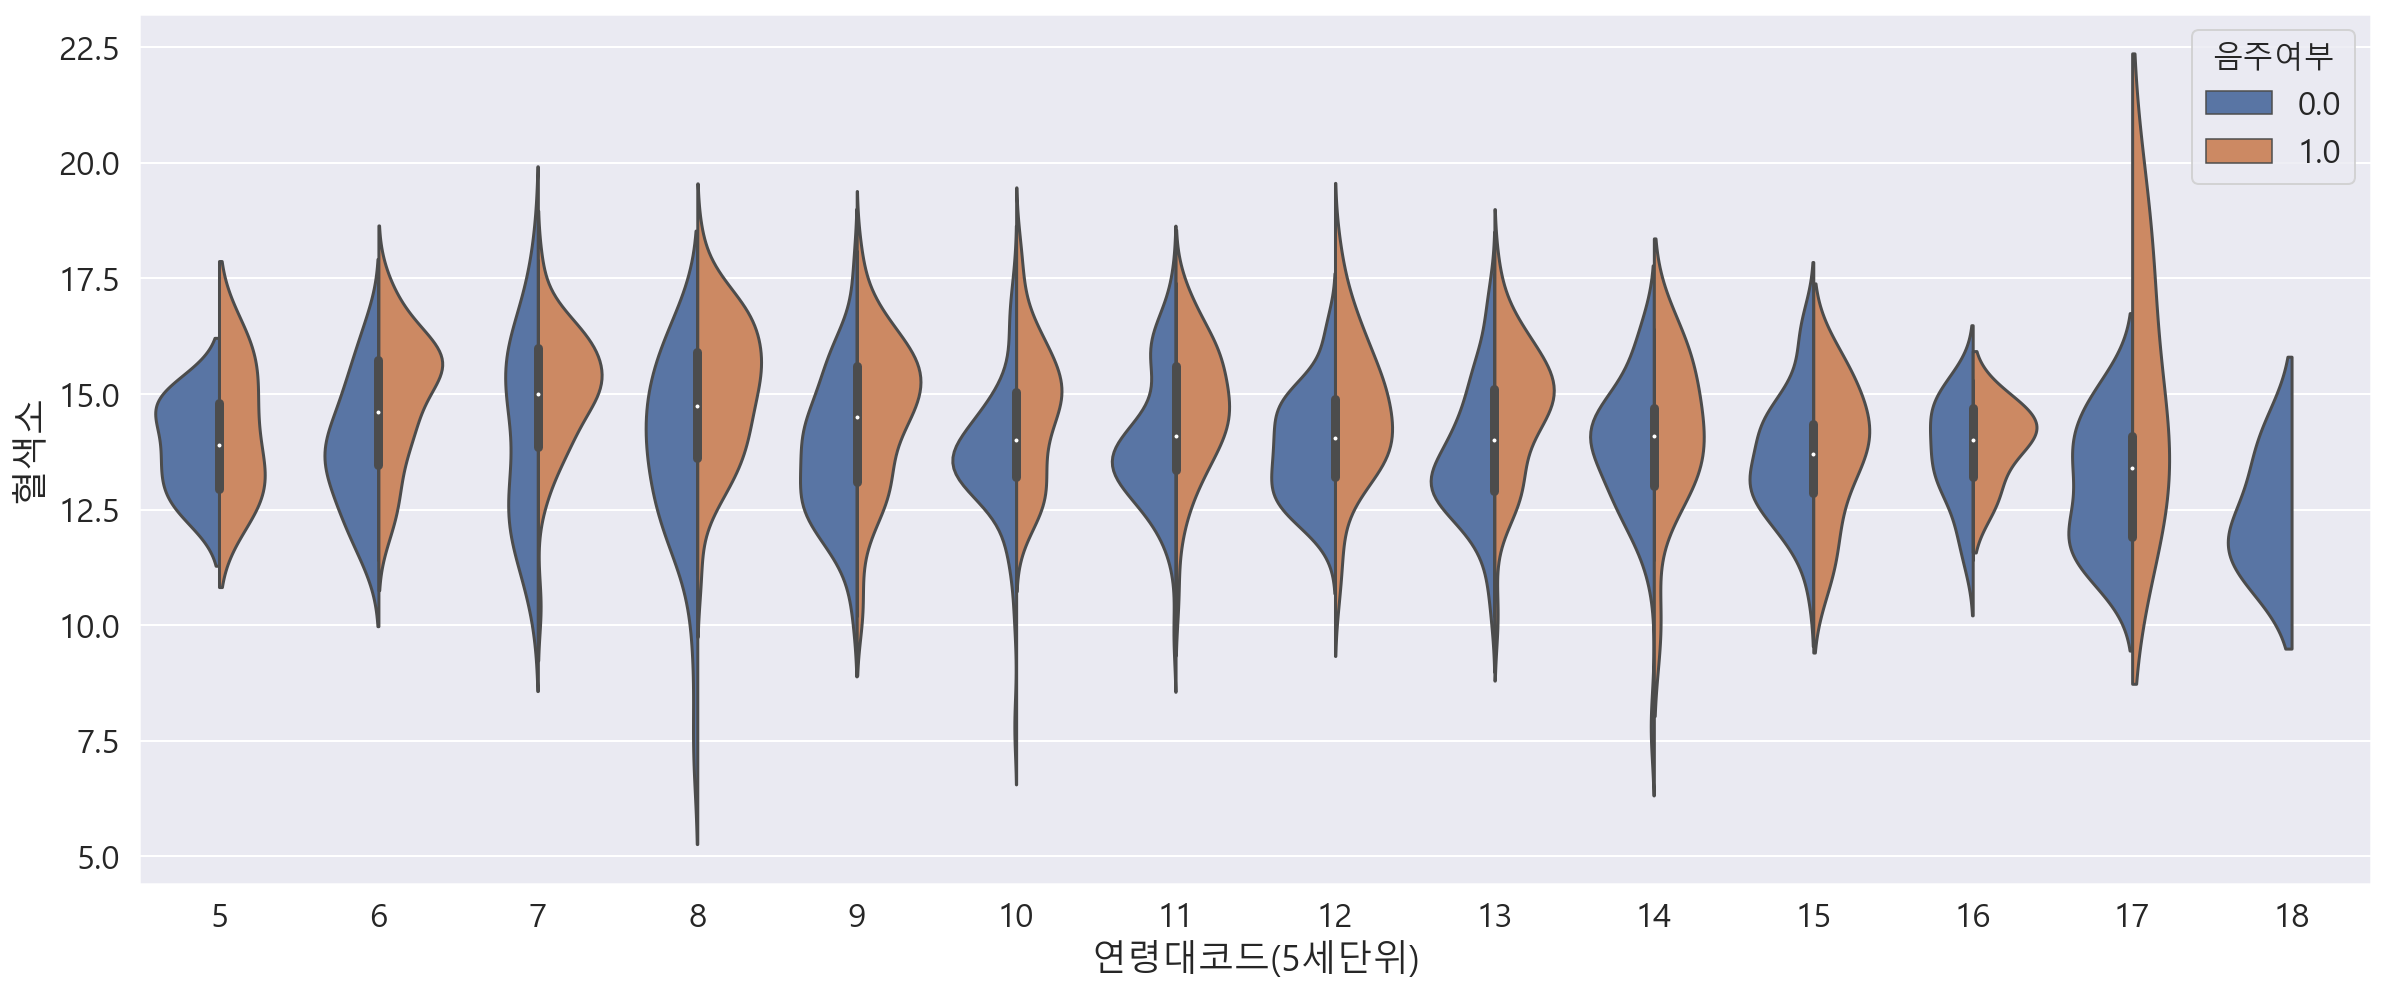

In [108]:
plt.figure(figsize=(20,8))
sns.violinplot(data=df_sample, x='연령대코드(5세단위)', y='혈색소', hue='음주여부', split=True)

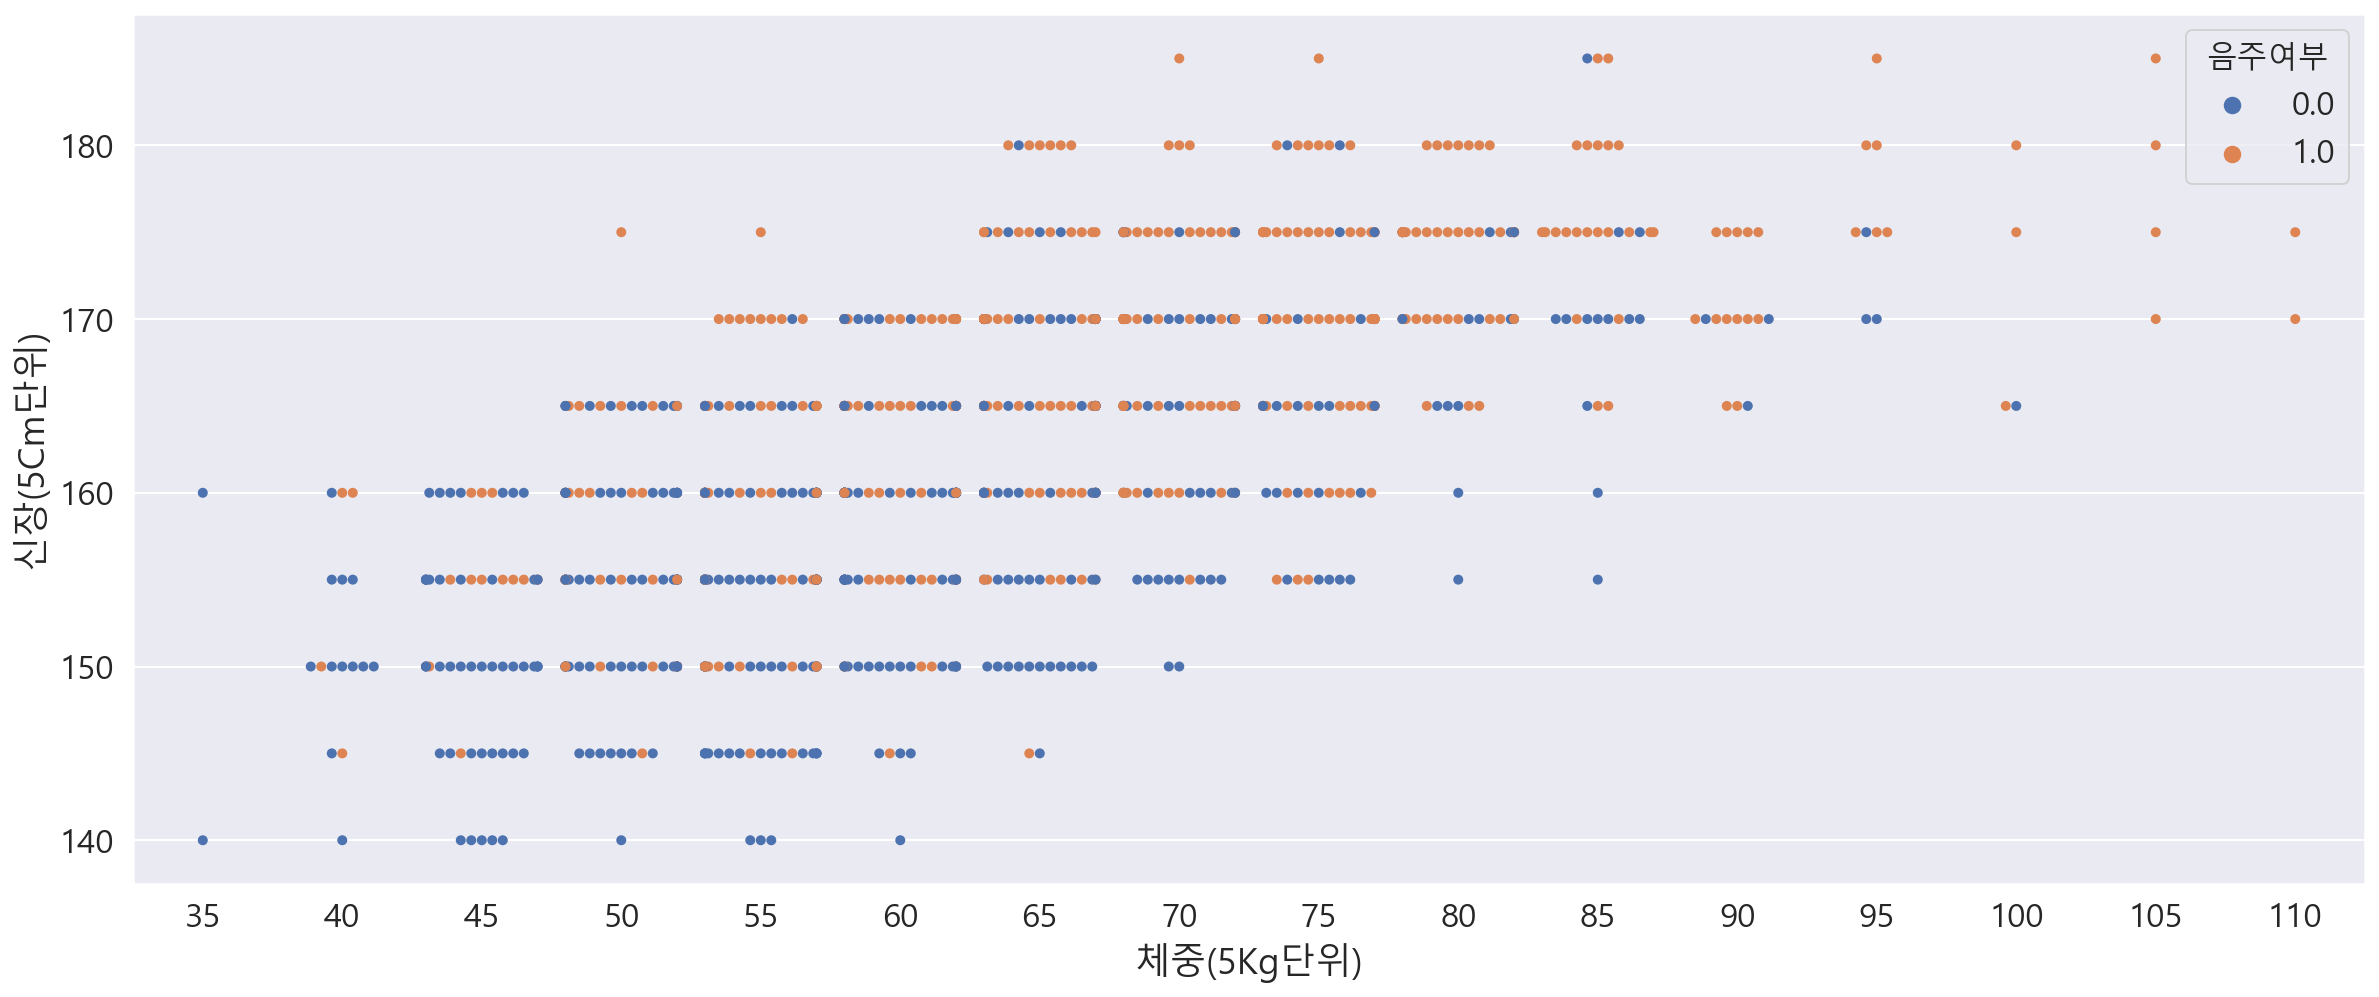

In [111]:
plt.figure(figsize=(20,8))
sns.swarmplot(data=df_sample, x='체중(5Kg단위)', y='신장(5Cm단위)', hue='음주여부')

C:\Users\asdfa\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\asdfa\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


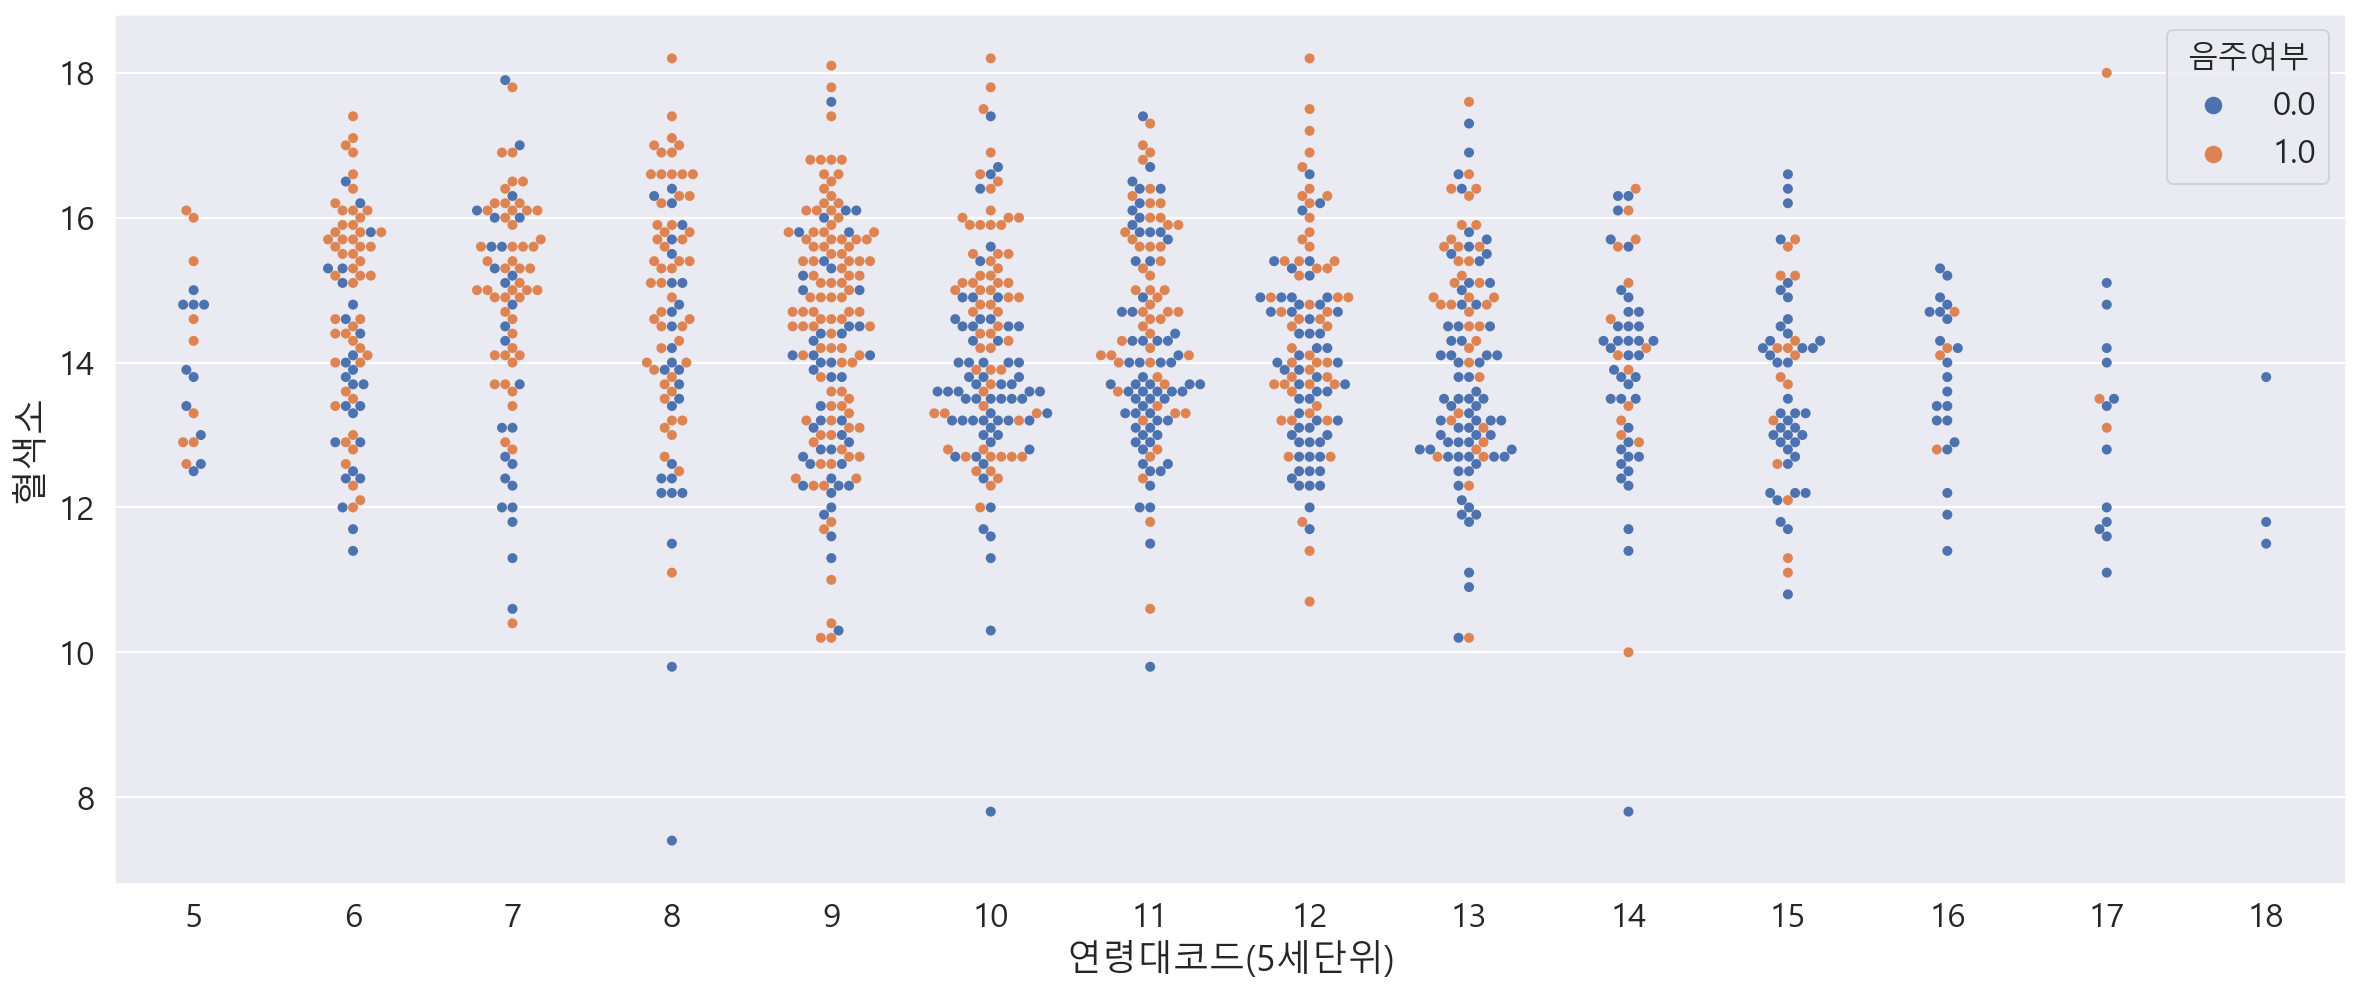

In [113]:
plt.figure(figsize=(20,8))
sns.swarmplot(data=df_sample, x='연령대코드(5세단위)', y='혈색소', hue='음주여부')

<Figure size 1440x576 with 0 Axes>

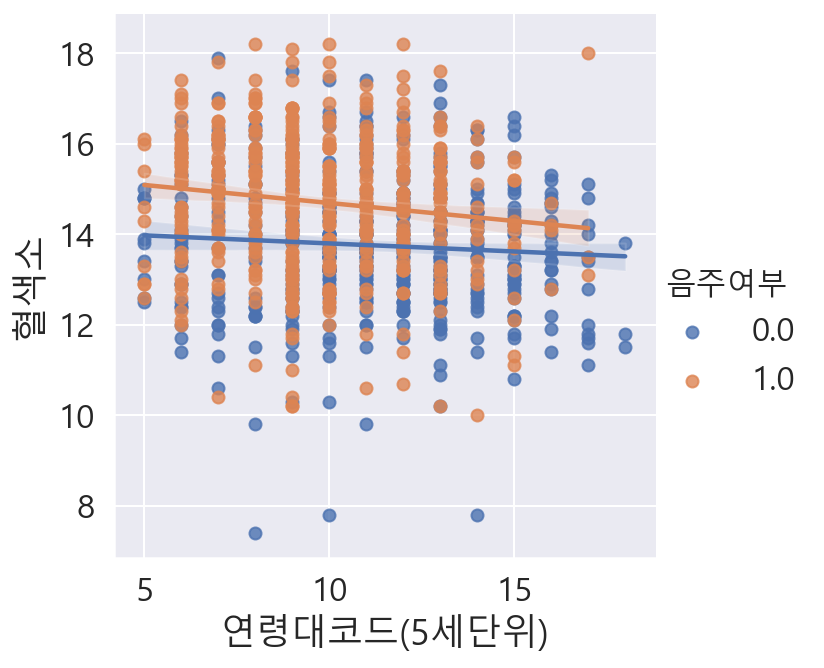

In [115]:
plt.figure(figsize=(20,8))
sns.lmplot(data=df_sample, x='연령대코드(5세단위)', y='혈색소', hue='음주여부')
# 회귀선은 x축과 y축 데이터의 상관관계를 알려준다.

<Figure size 1440x576 with 0 Axes>

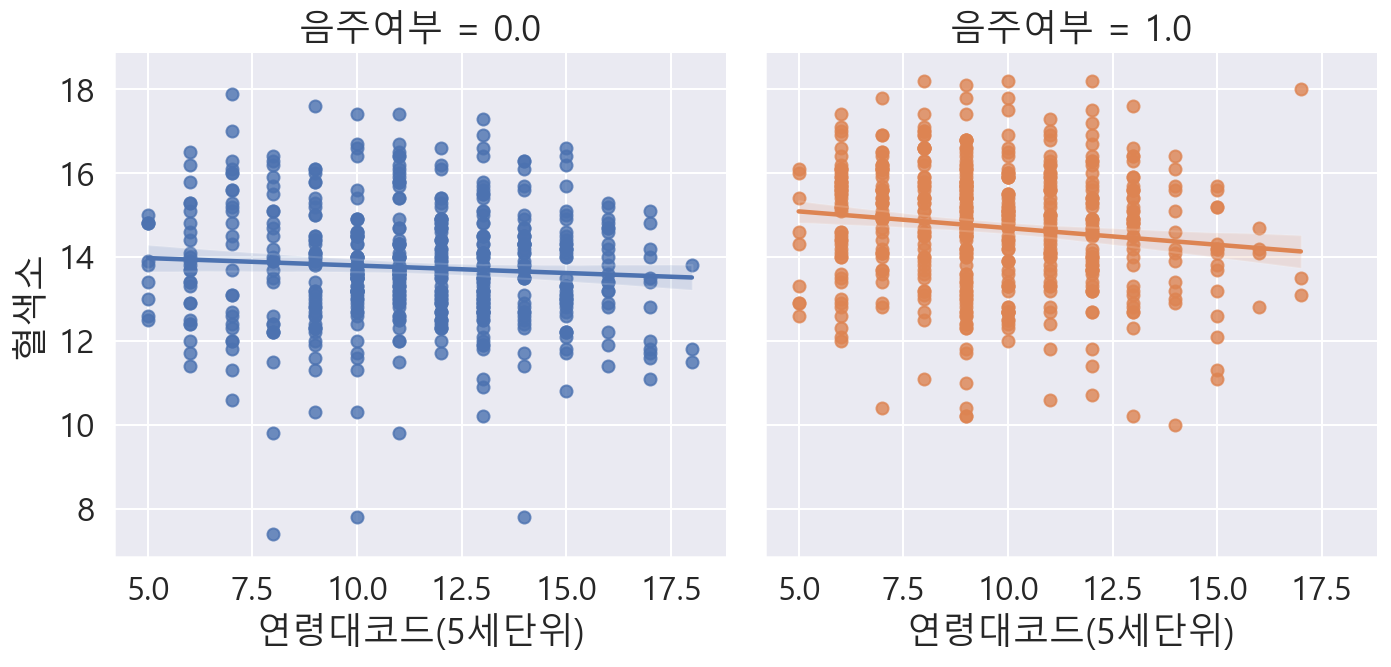

In [116]:
plt.figure(figsize=(20,8))
sns.lmplot(data=df_sample, x='연령대코드(5세단위)', y='혈색소', hue='음주여부', col='음주여부')
# lmplot은 다변수의 데이터를 하나의 그래프에 보여줄 수가 있다.

<Figure size 1440x576 with 0 Axes>

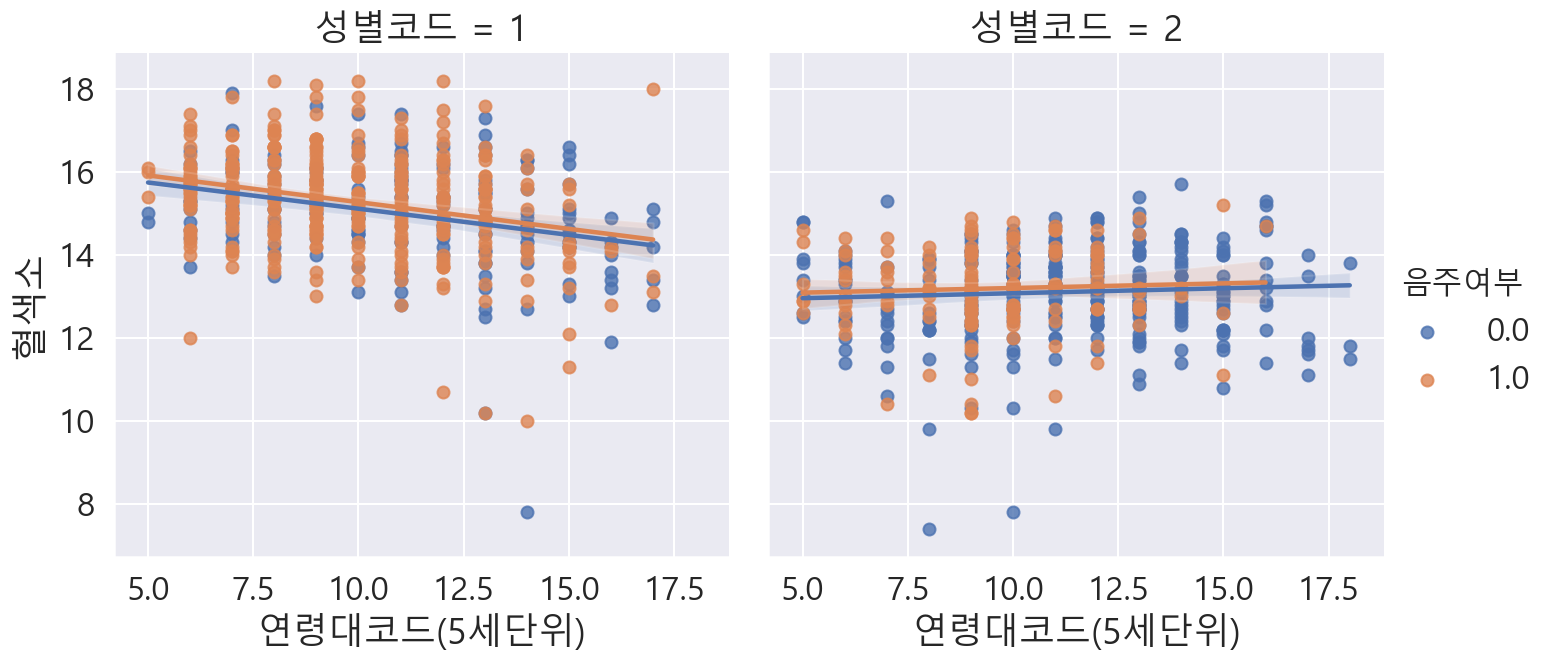

In [117]:
plt.figure(figsize=(20,8))
sns.lmplot(data=df_sample, x='연령대코드(5세단위)', y='혈색소', hue='음주여부', col='성별코드')
# 회귀선은 x축과 y축 데이터의 상관관계를 알려준다.

#### distplot

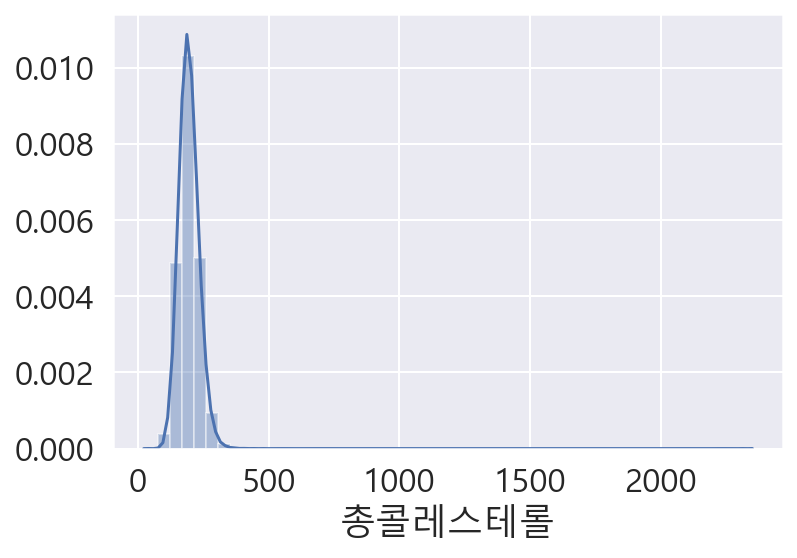

In [148]:
sns.distplot(df['총콜레스테롤'])

In [150]:
df['총콜레스테롤'].isnull().sum()
# 원래 distplot은 결측치가 있으면 그려지지 않으므로 결측치를 제외한 값을 가져와서 그려야함

43

In [ ]:
df['총콜레스테롤'].notnull()
# 이 값은 boolean 값이므로 밑에와 같이 인덱싱을 해서 값을 만든다.

In [153]:
df_chol = df[df['총콜레스테롤'].notnull()]

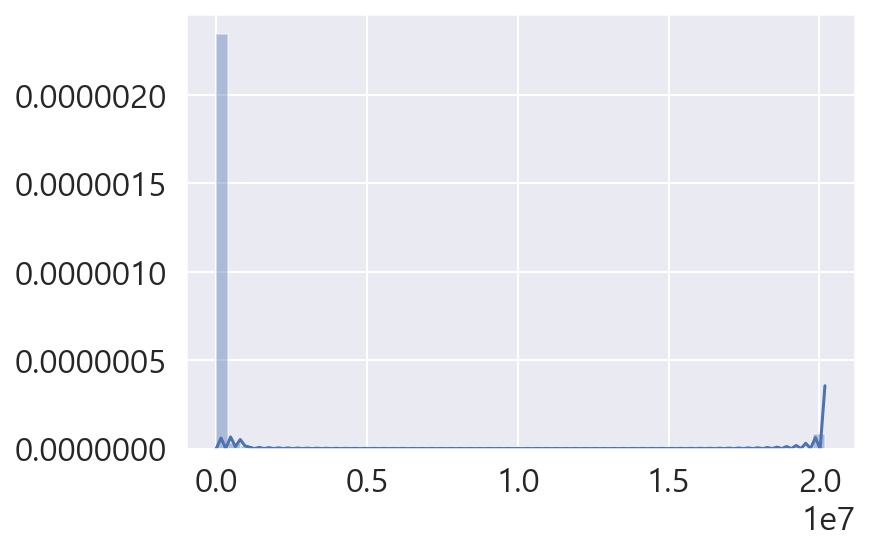

In [154]:
sns.distplot(df_chol)
#df_chol은 데이터 프레임 형태이다. 그러나 distplot()에 들어가려면 series형태여야 한다. 그러므로 총콜레스테롤을 인덱싱한다.

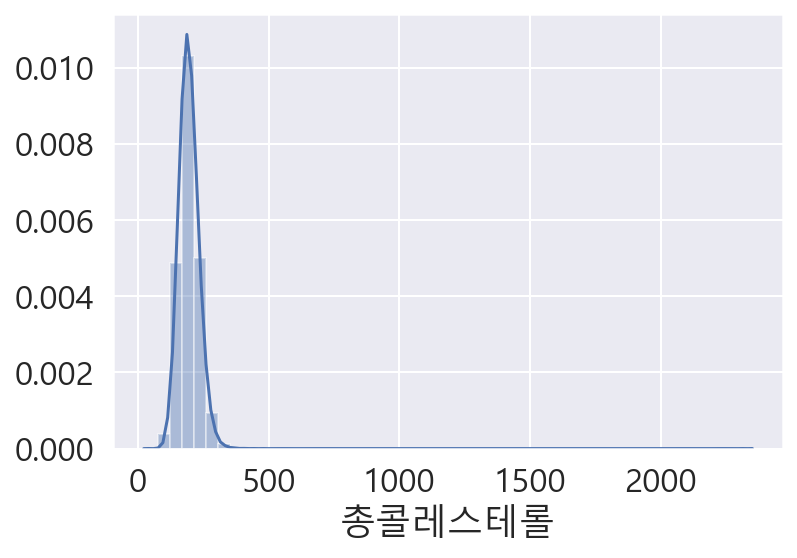

In [155]:
sns.distplot(df_chol['총콜레스테롤'])

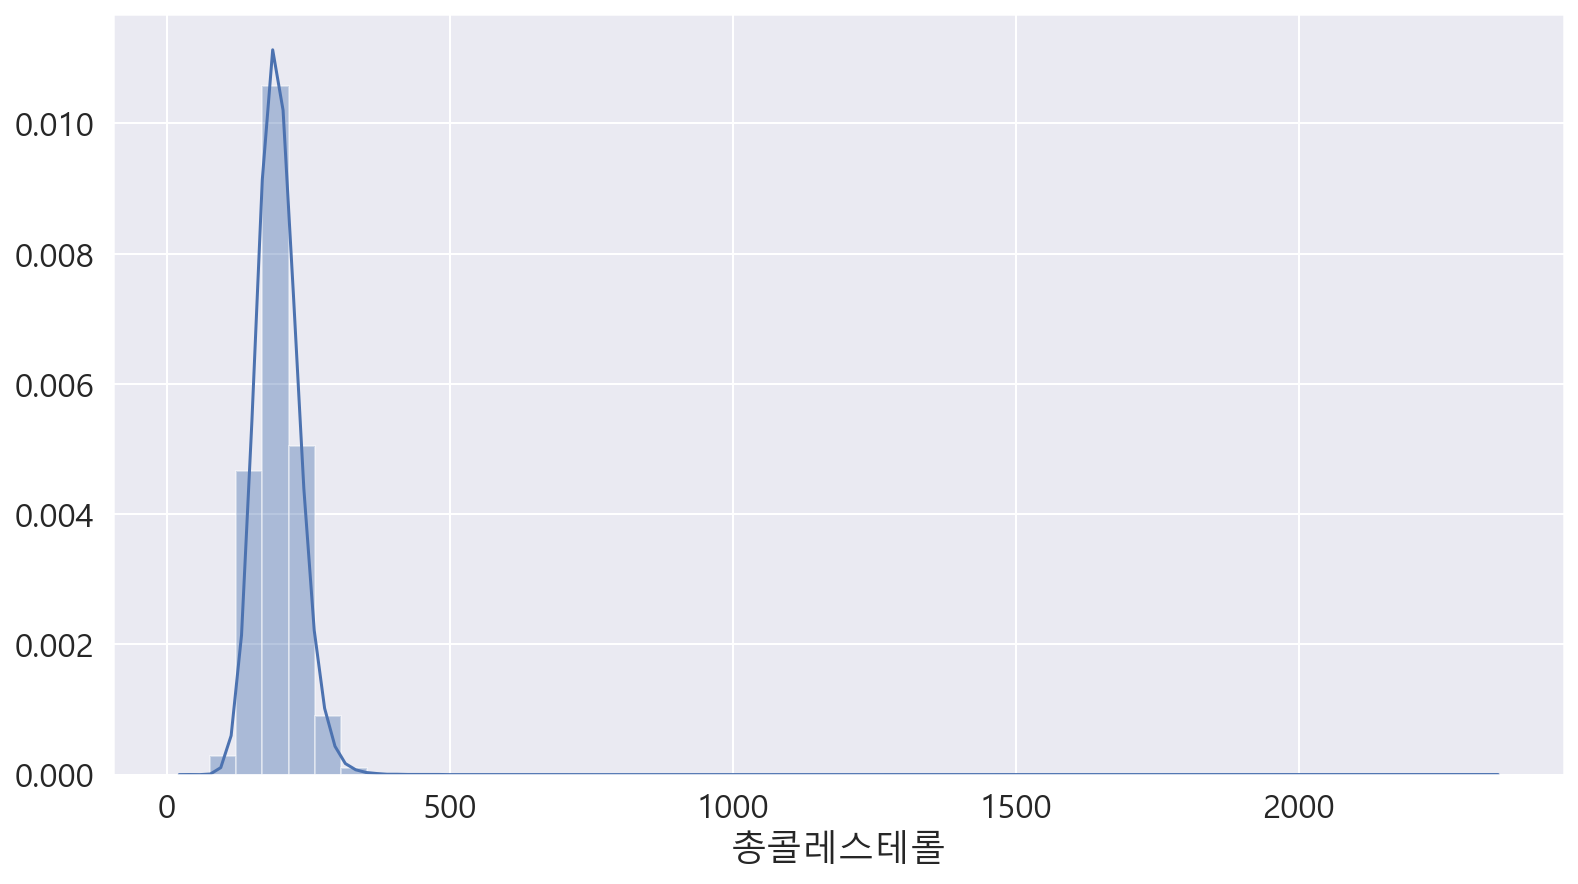

In [158]:
# 음주여부가 1인 값에 대한 총콜레스테롤 을 distplot으로 그려보자
plt.figure(figsize=(13,7))
sns.distplot(df_chol.loc[df_chol['음주여부'] == 1, '총콜레스테롤'])

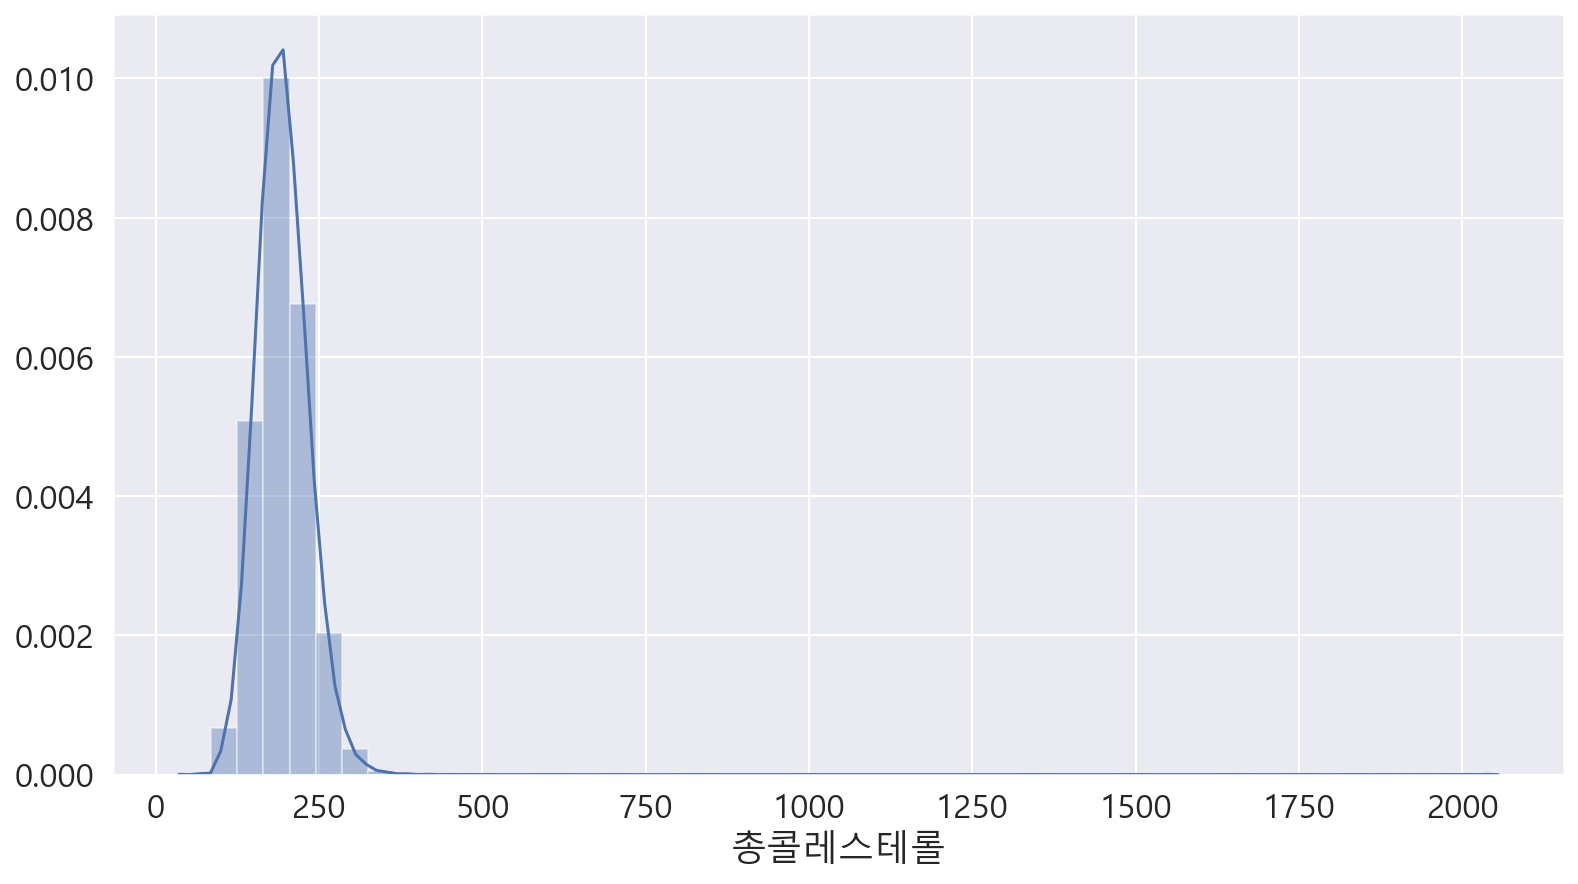

In [159]:
# 음주여부가 0인 값에 대한 총콜레스테롤 을 distplot으로 그려보자
plt.figure(figsize=(13,7))
sns.distplot(df_chol.loc[df_chol['음주여부'] == 0, '총콜레스테롤'])

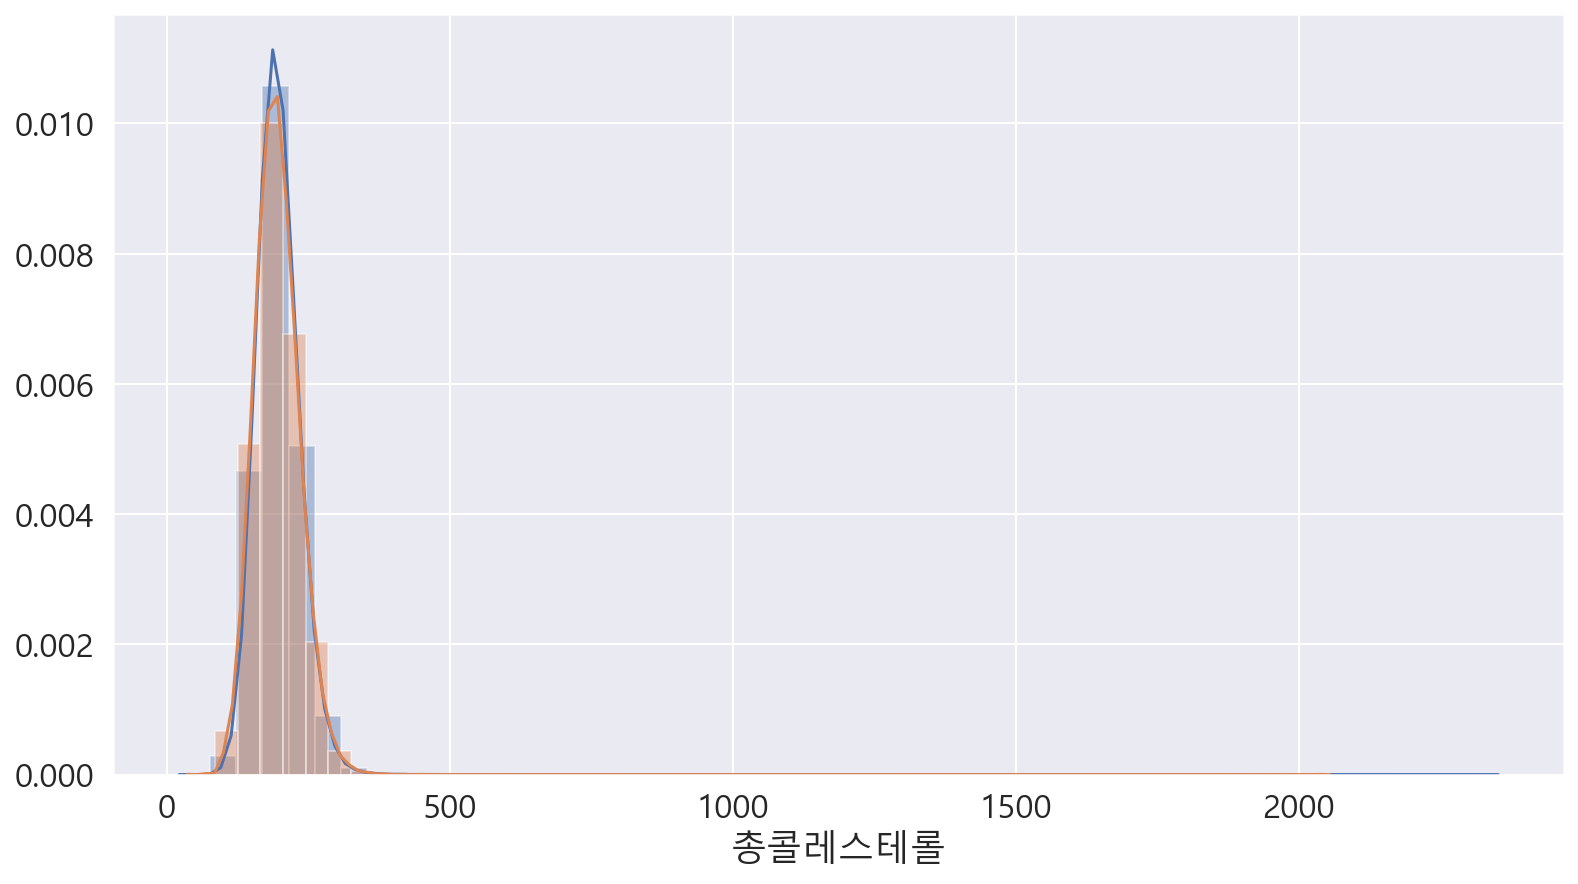

In [160]:
# 음주여부에 대한 총콜레스테롤 을 하나의 distplot으로 그려보자
plt.figure(figsize=(13,7))
sns.distplot(df_chol.loc[df_chol['음주여부'] == 1, '총콜레스테롤'])

sns.distplot(df_chol.loc[df_chol['음주여부'] == 0, '총콜레스테롤'])

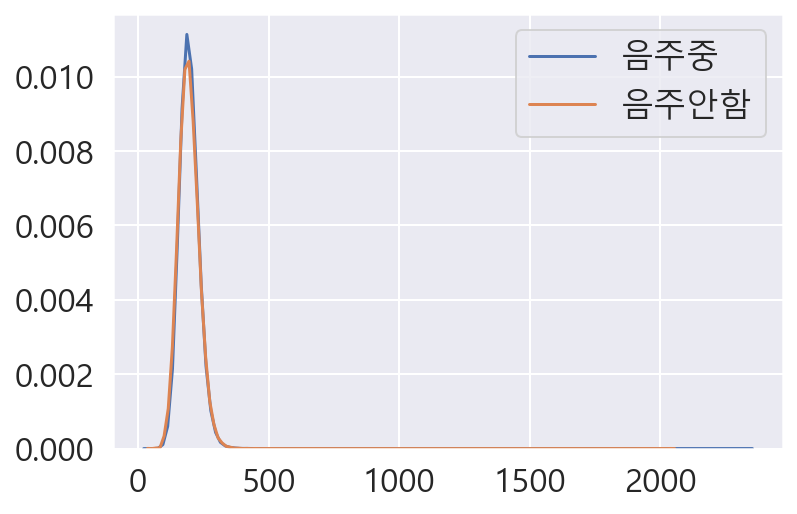

In [163]:
# 히스토그램을 없애고 싶으면 hist=False나 kdeplot으로 그리면된다.
sns.kdeplot(df_chol.loc[df_chol['음주여부'] == 1, '총콜레스테롤'], label='음주중')
sns.kdeplot(df_chol.loc[df_chol['음주여부'] == 0, '총콜레스테롤'], label='음주안함')

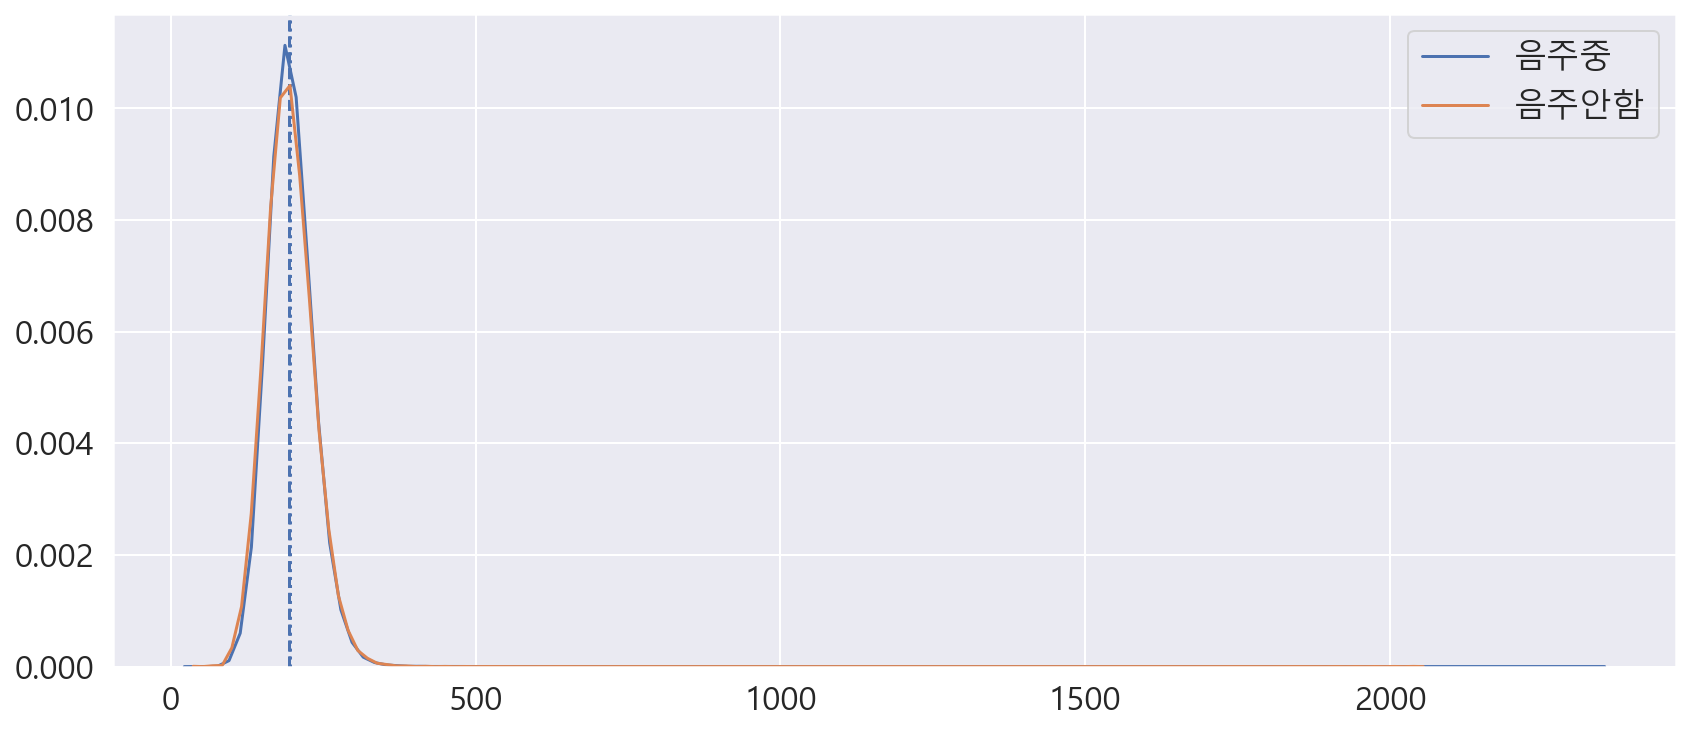

In [168]:
# 히스토그램을 없애고 싶으면 hist=False나 kdeplot으로 그리면된다.
plt.figure(figsize=(14,6))
plt.axvline(df_chol['총콜레스테롤'].mean(), linestyle=":") # 평균값의 선을 그린다.
plt.axvline(df_chol['총콜레스테롤'].median(), linestyle="--") # 중위값의 선을 그린다.
sns.kdeplot(df_chol.loc[df_chol['음주여부'] == 1, '총콜레스테롤'], label='음주중')
sns.kdeplot(df_chol.loc[df_chol['음주여부'] == 0, '총콜레스테롤'], label='음주안함')

In [177]:
# 음주여부에 따른 감마지티피 값을 distplot으로 시각화해보자
df_1 = df_sample.loc[df_sample['음주여부']==1, '감마지티피']
df_0 = df_sample.loc[df_sample['음주여부']==0, '감마지티피']

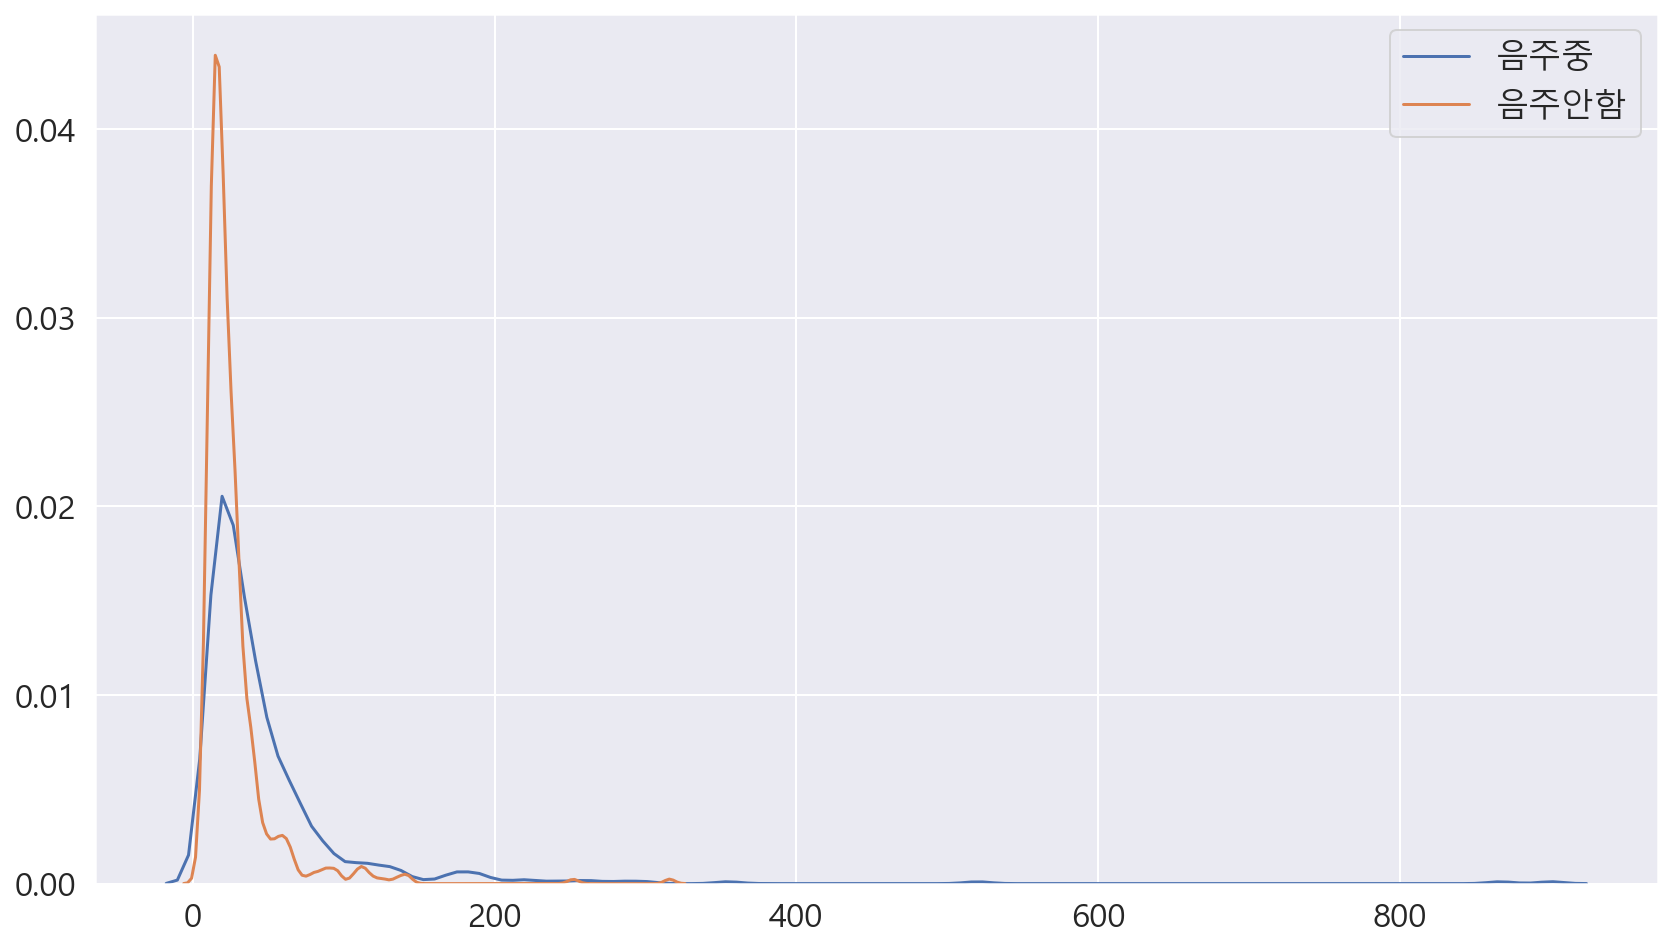

In [178]:
plt.figure(figsize=(14,8))
sns.kdeplot(df_1, label='음주중')
sns.kdeplot(df_0, label='음주안함')
# 음주안하는 사람들이 0쪽에 더 몰려있음을 알 수 있다.

### 수치형 데이터 시각화

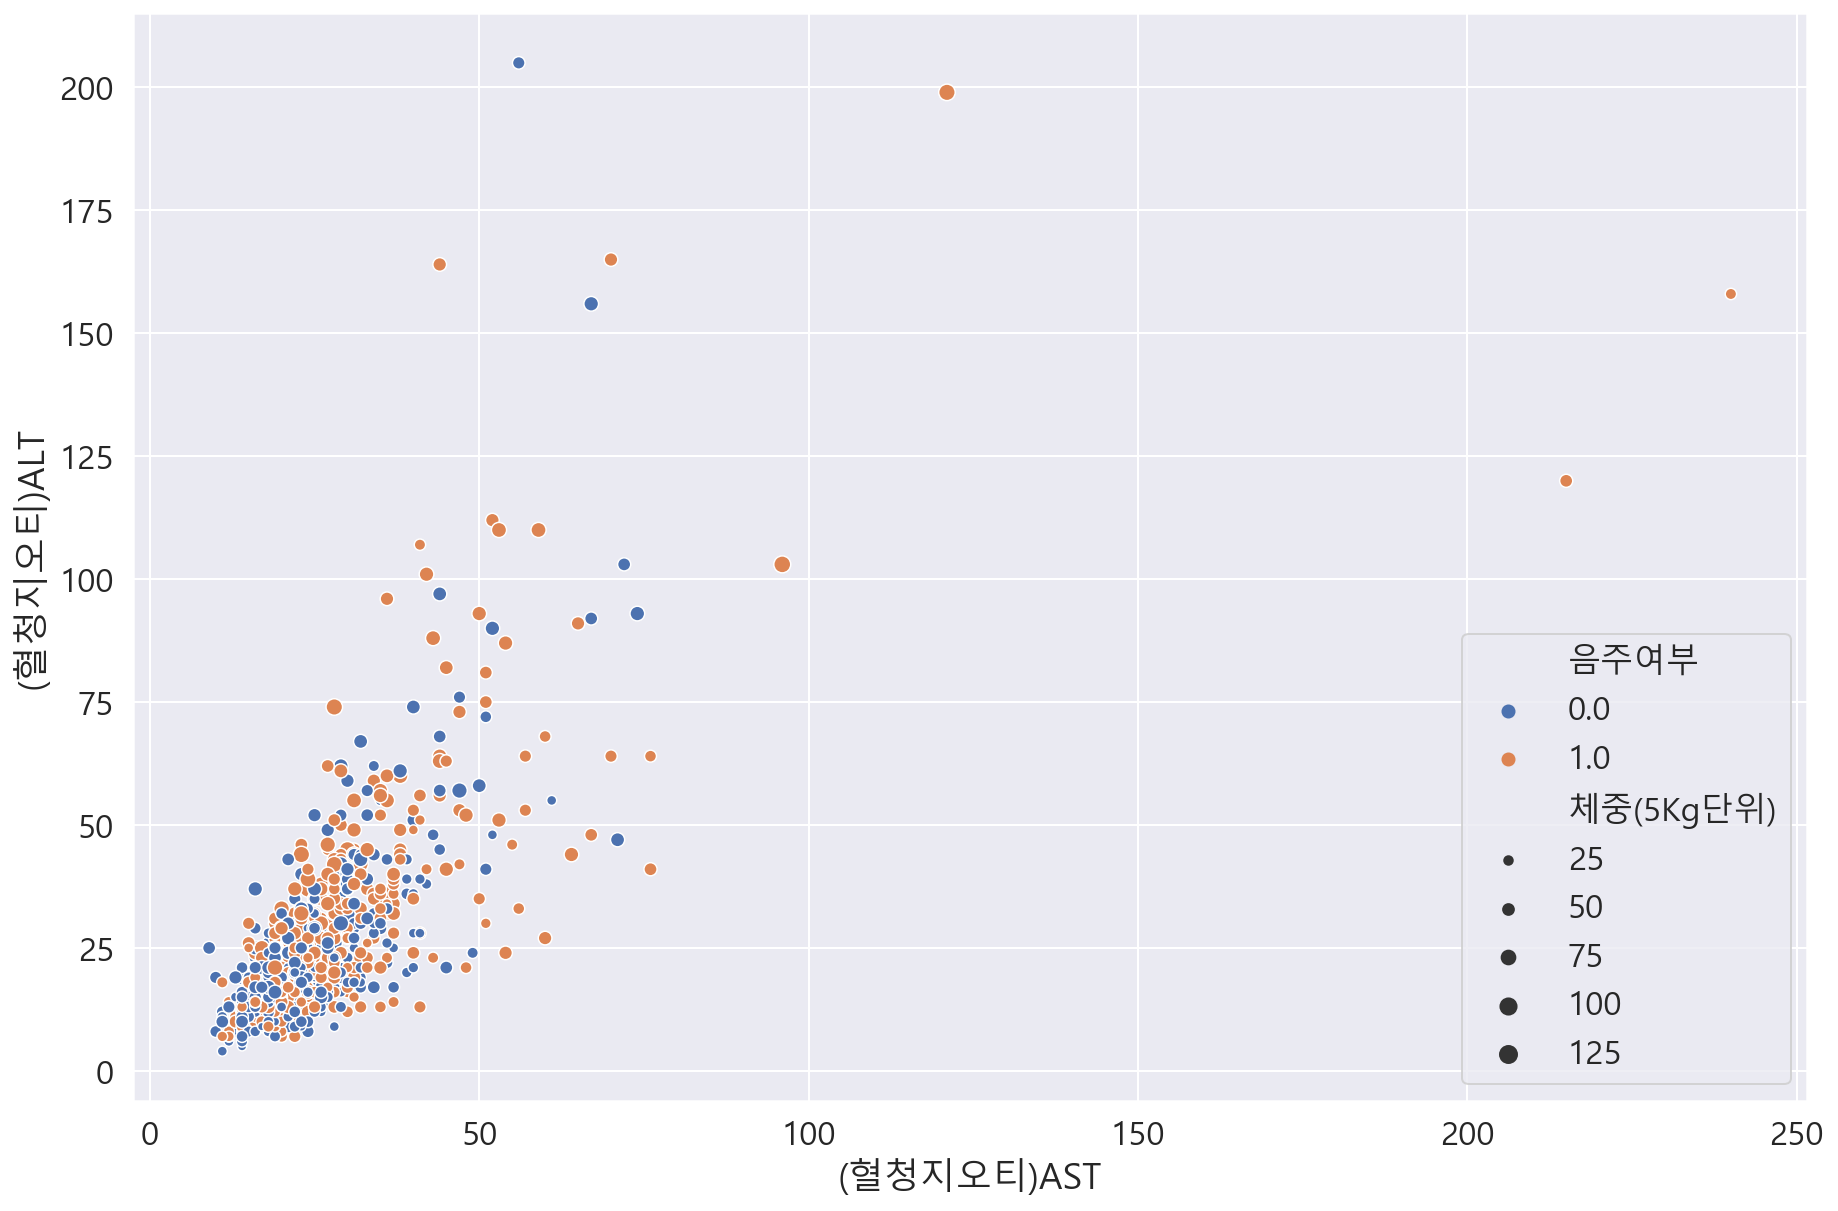

In [123]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', size='체중(5Kg단위)')

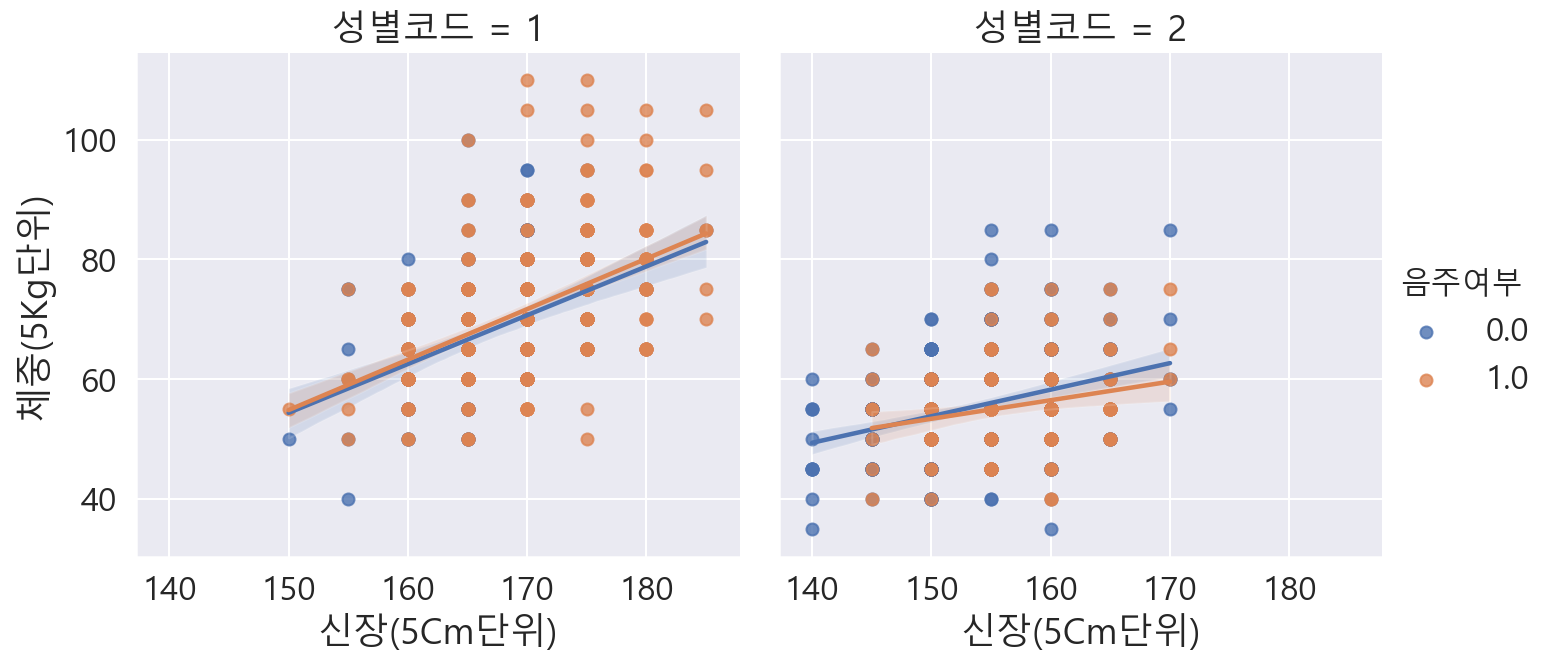

In [125]:
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='음주여부', col="성별코드")

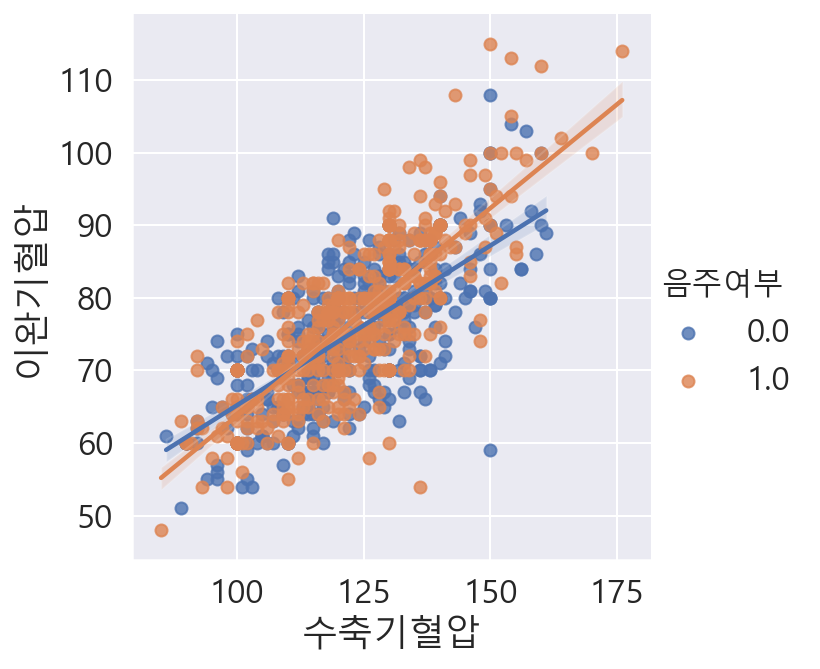

In [127]:
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue='음주여부')

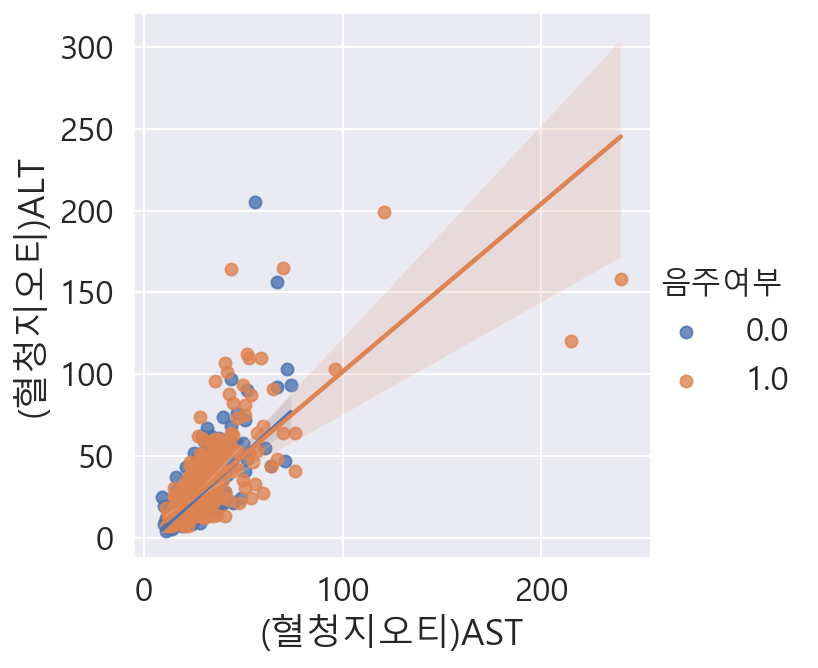

In [128]:
sns.lmplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', robust=True)
# robust=True를 하면 이상치를 제거하고 그래프를 그린다. 대신 그래프를 출력하는 데에 오래 걸린다.

### 이상치 다루기

In [132]:
df_ASLT = df_sample[(df_sample['(혈청지오티)ALT']<400) & (df_sample['(혈청지오티)AST']<400)]

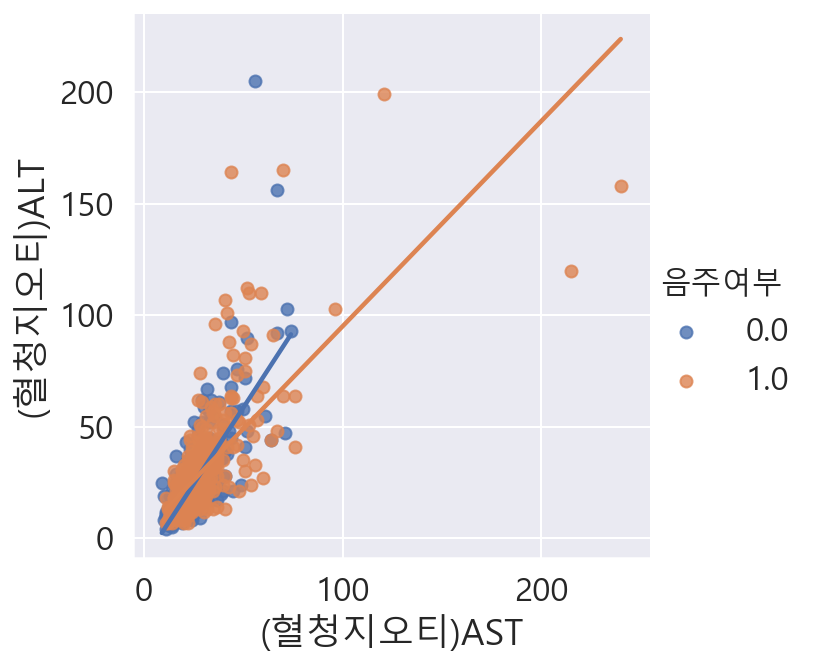

In [133]:
sns.lmplot(data=df_ASLT, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', ci=None)

In [140]:
df_ASLT_high = df_sample[(df_sample['(혈청지오티)ALT']>400) | (df_sample['(혈청지오티)AST']>400)]

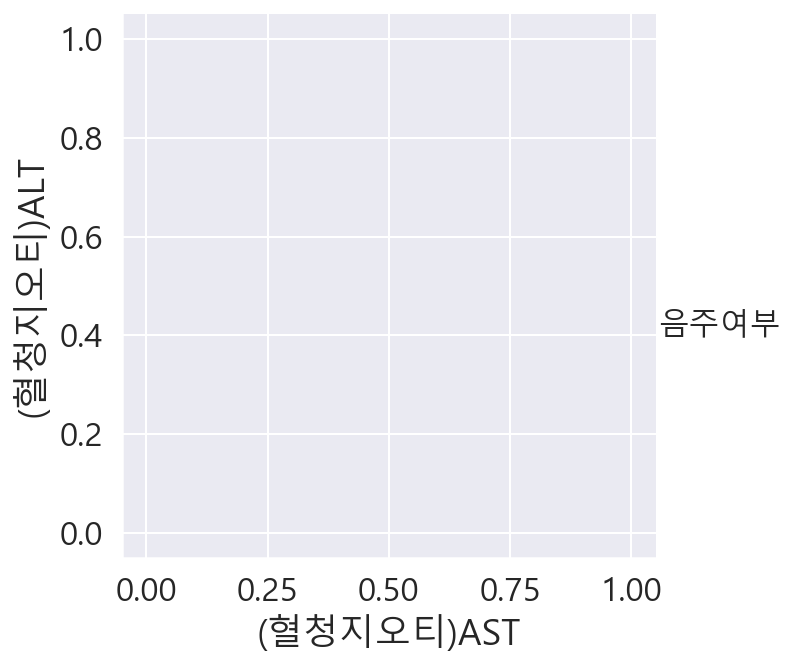

In [141]:
sns.lmplot(data=df_ASLT_high, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', ci=None)

In [147]:
df_ASLT_high[df_ASLT_high['(혈청지오티)ALT']>100]

Empty DataFrame
Columns: [기준년도, 가입자일련번호, 성별코드, 연령대코드(5세단위), 시도코드, 신장(5Cm단위), 체중(5Kg단위), 허리둘레, 시력(좌), 시력(우), 청력(좌), 청력(우), 수축기혈압, 이완기혈압, 식전혈당(공복혈당), 총콜레스테롤, 트리글리세라이드, HDL콜레스테롤, LDL콜레스테롤, 혈색소, 요단백, 혈청크레아티닌, (혈청지오티)AST, (혈청지오티)ALT, 감마지티피, 흡연상태, 음주여부, 구강검진수검여부, 치아우식증유무, 결손치유무, 치아마모증유무, 제3대구치(사랑니)이상, 치석, 데이터공개일자]
Index: []

[0 rows x 34 columns]

### 상관분석

In [183]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

In [187]:
df_corr = df_sample.corr()

In [189]:
df_corr["신장(5Cm단위)"].sort_values()

성별코드           -0.746638
연령대코드(5세단위)    -0.380239
HDL콜레스테롤       -0.207537
청력(우)          -0.074738
청력(좌)          -0.064044
가입자일련번호        -0.045786
요단백            -0.007699
총콜레스테롤         -0.004133
치석             -0.001825
식전혈당(공복혈당)      0.005997
LDL콜레스테롤        0.008146
시도코드            0.012970
(혈청지오티)AST      0.055783
수축기혈압           0.063929
구강검진수검여부        0.106946
트리글리세라이드        0.135087
이완기혈압           0.157810
(혈청지오티)ALT      0.159199
감마지티피           0.185091
시력(좌)           0.202426
혈청크레아티닌         0.212811
시력(우)           0.236260
허리둘레            0.312230
음주여부            0.410946
흡연상태            0.512294
혈색소             0.541155
체중(5Kg단위)       0.665067
신장(5Cm단위)       1.000000
기준년도                 NaN
치아우식증유무              NaN
결손치유무                NaN
치아마모증유무              NaN
제3대구치(사랑니)이상         NaN
데이터공개일자              NaN
Name: 신장(5Cm단위), dtype: float64

In [192]:
df_corr.loc[df_corr["신장(5Cm단위)"].sort_values() > 0.1, "신장(5Cm단위)"]

신장(5Cm단위)     1.000000
체중(5Kg단위)     0.665067
허리둘레          0.312230
시력(좌)         0.202426
시력(우)         0.236260
이완기혈압         0.157810
트리글리세라이드      0.135087
혈색소           0.541155
혈청크레아티닌       0.212811
(혈청지오티)ALT    0.159199
감마지티피         0.185091
흡연상태          0.512294
음주여부          0.410946
구강검진수검여부      0.106946
Name: 신장(5Cm단위), dtype: float64

In [193]:
df_corr.loc[df_corr["음주여부"].sort_values() > 0.1, "음주여부"]

신장(5Cm단위)     0.410946
체중(5Kg단위)     0.290207
허리둘레          0.134891
시력(우)         0.158678
이완기혈압         0.108679
트리글리세라이드      0.134188
혈색소           0.312005
(혈청지오티)AST    0.125927
(혈청지오티)ALT    0.138756
감마지티피         0.206864
흡연상태          0.344286
음주여부          1.000000
구강검진수검여부      0.100594
Name: 음주여부, dtype: float64

In [195]:
df_corr['혈색소'].sort_values(ascending=False)

혈색소             1.000000
신장(5Cm단위)       0.541155
체중(5Kg단위)       0.540191
흡연상태            0.434467
허리둘레            0.377673
(혈청지오티)ALT      0.331891
음주여부            0.312005
이완기혈압           0.255690
감마지티피           0.245109
(혈청지오티)AST      0.224768
트리글리세라이드        0.220292
시력(우)           0.190303
수축기혈압           0.169241
시력(좌)           0.142582
식전혈당(공복혈당)      0.124883
구강검진수검여부        0.122835
혈청크레아티닌         0.108274
총콜레스테롤          0.087261
LDL콜레스테롤        0.068631
요단백             0.039249
치석              0.034223
가입자일련번호         0.015393
시도코드            0.013586
청력(좌)          -0.000433
청력(우)          -0.050208
연령대코드(5세단위)    -0.178977
HDL콜레스테롤       -0.252492
성별코드           -0.665420
기준년도                 NaN
치아우식증유무              NaN
결손치유무                NaN
치아마모증유무              NaN
제3대구치(사랑니)이상         NaN
데이터공개일자              NaN
Name: 혈색소, dtype: float64

In [208]:
import numpy as np

In [215]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask
# heatmap의 필요없는 부분을 없애기 위한 코드

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

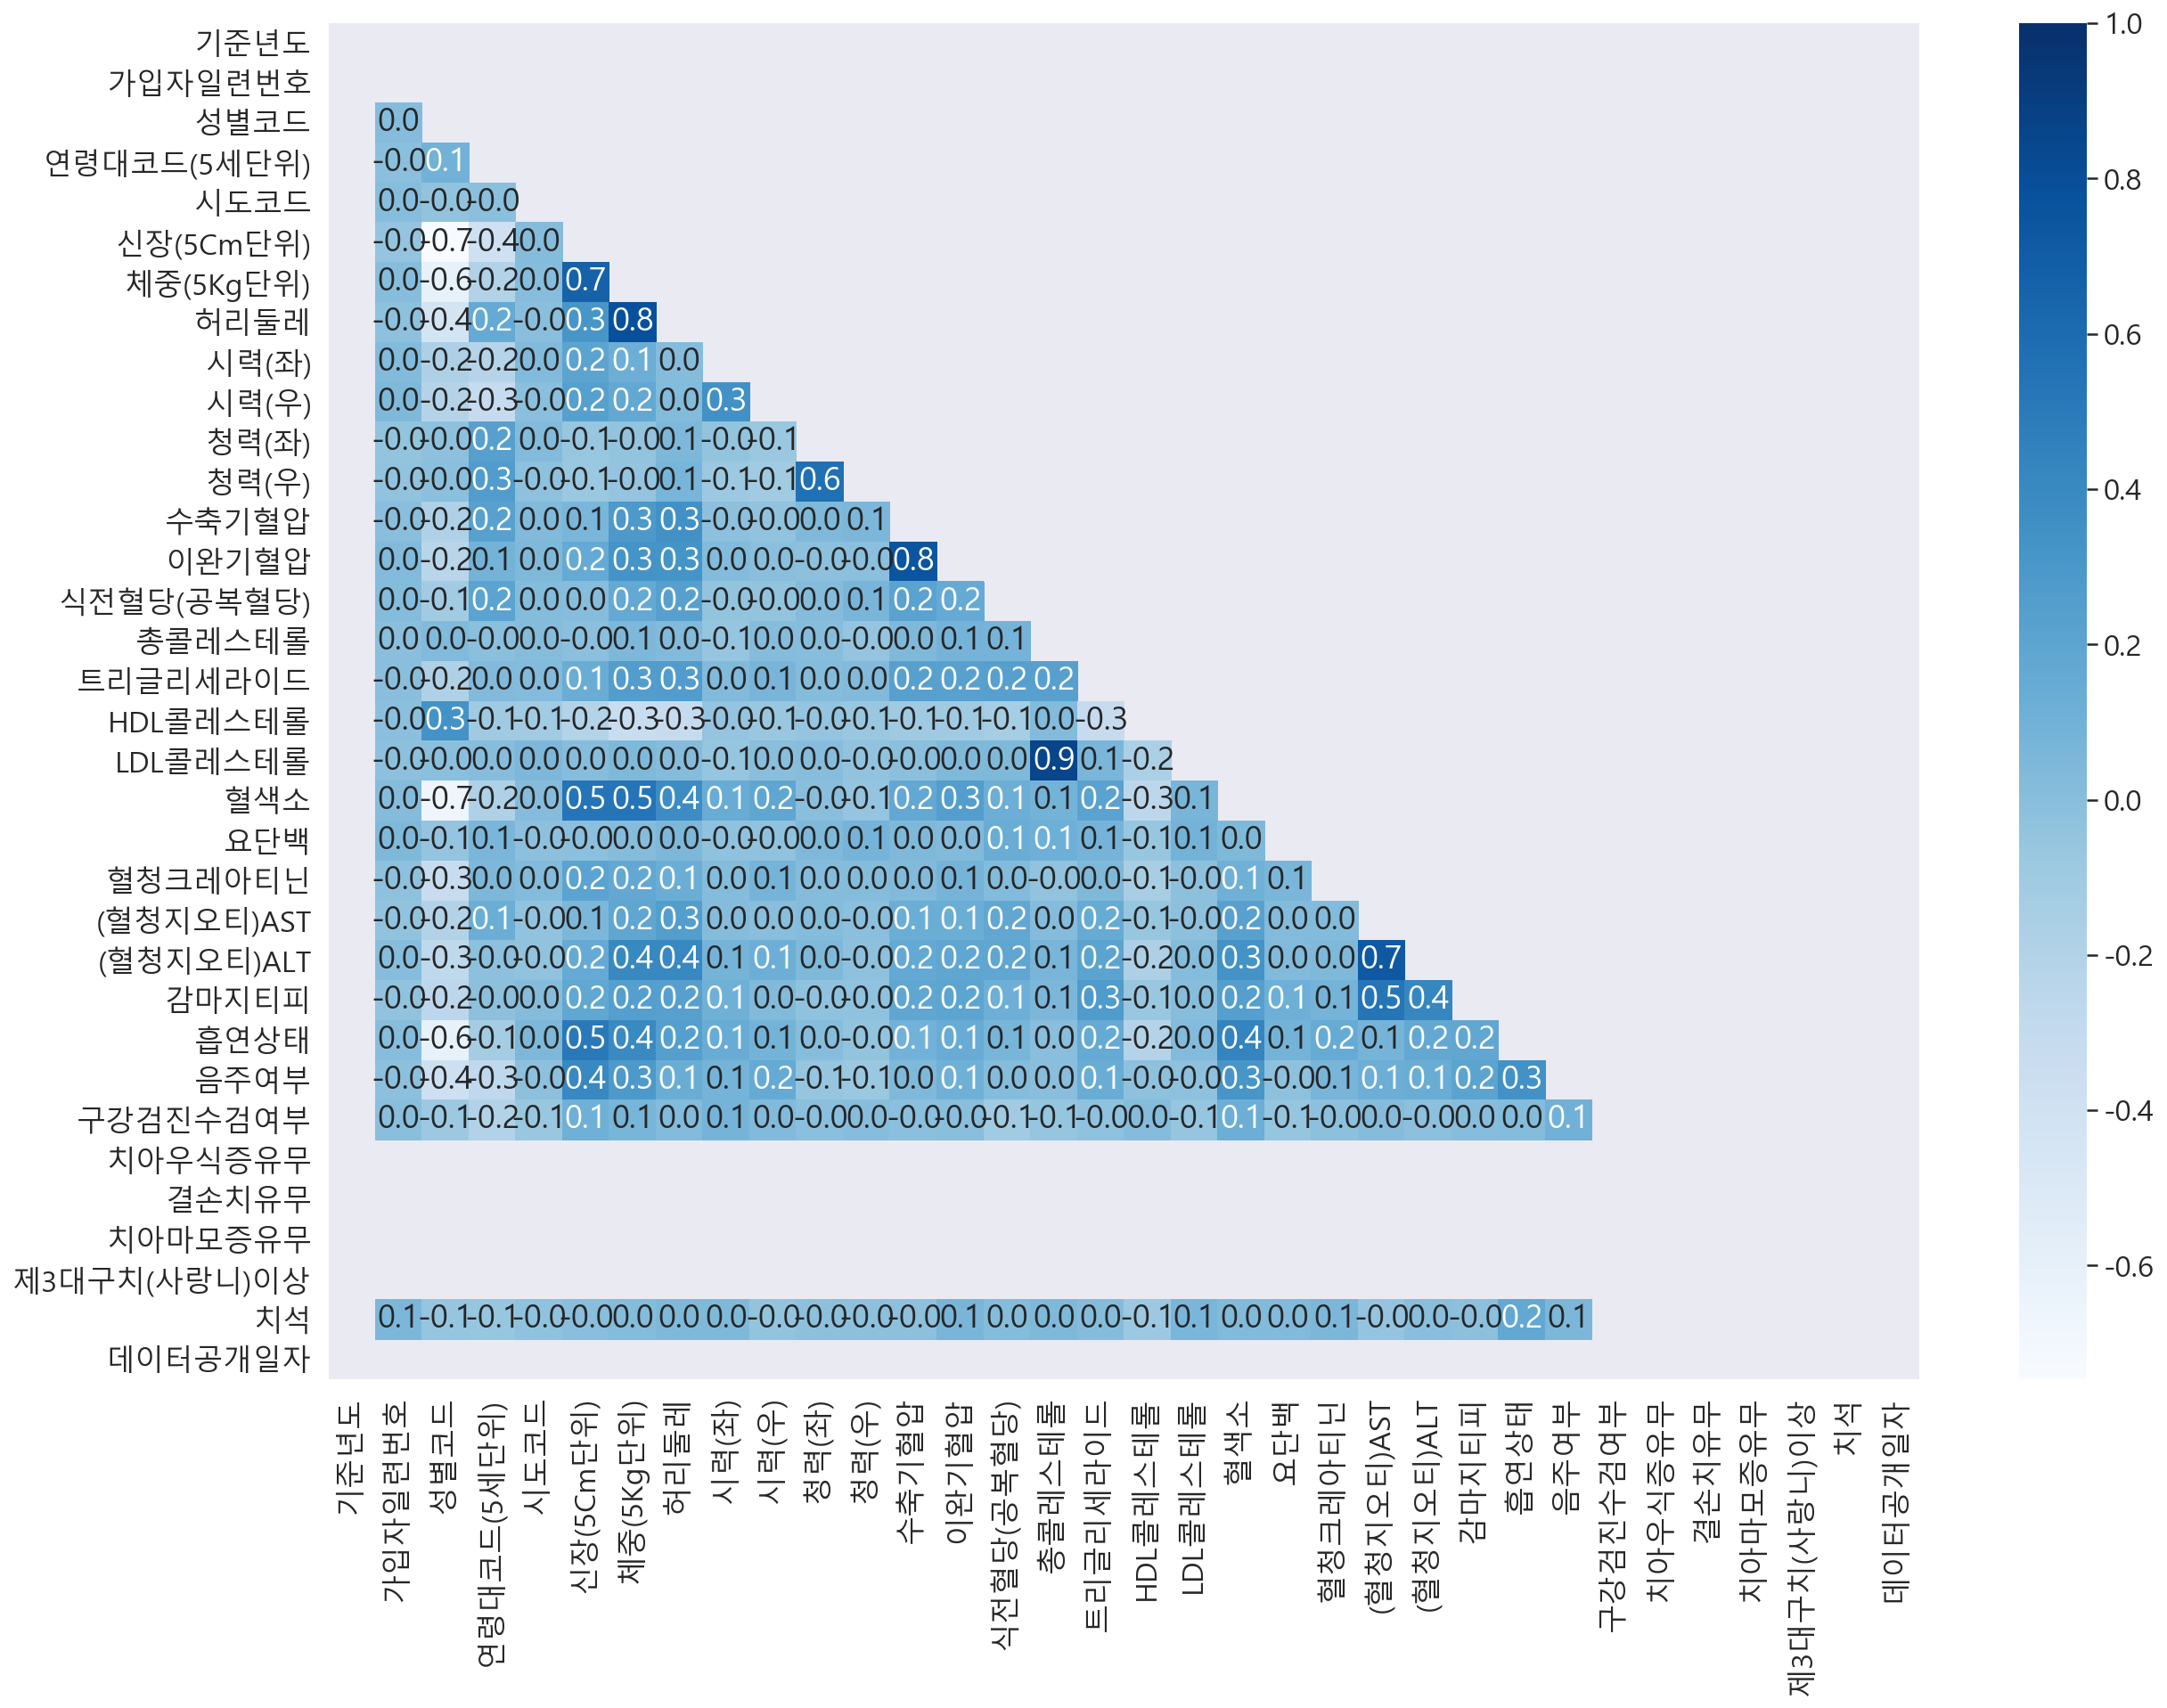

In [216]:

plt.figure(figsize=(20,14))
sns.heatmap(df_corr, annot=True, fmt=".1f", cmap='Blues', mask=mask)